In [9]:
# Initial imports

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Set the path to CSV file
whale_returns_path = Path("/Users/coneychiwabee/fintech_uoftbootcamp/Homework/pandas-homework/Starter_Code/Resources/whale_returns.csv")
algo_returns_path = Path("/Users/coneychiwabee/fintech_uoftbootcamp/Homework/pandas-homework/Starter_Code/Resources/algo_returns.csv")
sp_tsx_history_path = Path("/Users/coneychiwabee/fintech_uoftbootcamp/Homework/pandas-homework/Starter_Code/Resources/sp_tsx_history.csv")

# Read in the CSVs as a DataFrames
whale_returns = pd.read_csv(whale_returns_path, index_col="Date",parse_dates=True, infer_datetime_format=True)
algo_returns = pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_tsx_history = pd.read_csv(sp_tsx_history_path,index_col="Date", parse_dates=True, infer_datetime_format=True)


#whale_returns.head()
#algo_returns.head()
sp_tsx_history.head()

Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99

In [10]:
# PREPARE THE DATA
# Sort dates in ascending value and drop null values

whale_returns = whale_returns.sort_index().dropna().copy()
algo_returns = algo_returns.sort_index().dropna().copy()
sp_tsx_history = sp_tsx_history.sort_index().dropna().copy()

whale_returns.head()
#algo_returns.head()
#sp_tsx_history.head()


SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652

In [11]:
# Detect null values
whale_returns.isnull().mean() * 100
whale_returns.isnull().sum()

algo_returns.isnull().mean() * 100
algo_returns.isnull().sum()

sp_tsx_history.isnull().mean() * 100
sp_tsx_history.isnull().sum()
#sp_tsx_history.head()

sp_tsx_history.dtypes

Close    object
dtype: object

In [12]:
# Remove $ 
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace('$', '')
sp_tsx_history.head()

<ipython-input-12-d231fe9d7475>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace('$', '')


Close
Date                 
2012-10-01  12,370.19
2012-10-02  12,391.23
2012-10-03  12,359.47
2012-10-04  12,447.68
2012-10-05  12,418.99

In [13]:
#Convert close to from object to float
#Code Reference: https://stackoverflow.com/questions/39125665/cannot-convert-string-to-float-in-pandas-valueerror

sp_tsx_history = pd.concat(
                [sp_tsx_history[col].str.split()
                .str[0]
                .str.replace(',','').astype(float) for col in sp_tsx_history], axis=1)
sp_tsx_history.head()
#sp_tsx_history.dtypes

Close
Date                
2012-10-01  12370.19
2012-10-02  12391.23
2012-10-03  12359.47
2012-10-04  12447.68
2012-10-05  12418.99

In [14]:
# Convert the S&P TSX 60 closing prices to daily returns.
sp_tsx_history['S&P TSX 60 Returns'] = sp_tsx_history.pct_change(periods = 1)
sp_tsx_history.head()


Close  S&P TSX 60 Returns
Date                                    
2012-10-01  12370.19                 NaN
2012-10-02  12391.23            0.001701
2012-10-03  12359.47           -0.002563
2012-10-04  12447.68            0.007137
2012-10-05  12418.99           -0.002305

In [15]:
# Drop "Close" column
sp_tsx_returns = sp_tsx_history.drop(columns=['Close'])
sp_tsx_returns.head()

S&P TSX 60 Returns
Date                          
2012-10-01                 NaN
2012-10-02            0.001701
2012-10-03           -0.002563
2012-10-04            0.007137
2012-10-05           -0.002305

In [33]:
# Combine all dataframes in one dataframe
combined_returns_df = pd.concat(
    [whale_returns, algo_returns, sp_tsx_returns], axis="columns", join="inner")
combined_returns_df

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   
...                                 ...                     ...       ...   
2019-04-25                    -0.005153                0.004848  0.000682   
2019-04-26                     0.012355                0.010434  0.002981   
2019-04-29                     0.006251                0.005223  0.005208   
2019-04-30                    -0.000259               -0.003702 -0.002944   
2019-05-01                    -0.007936               -0.007833  0.000094   

              Algo 2  S&P TSX 60 Returns  
Date                                      
2015-03-03 -0.000949           -0.008530  
2015-03-04  0.002416           -0.003371  
2015-03-05  0.004323            0.001344  
2015-03-06 -0.011460           -0.009972  
2015-03-09  0.001303           -0.006555  
...              ...                 ...  
2019-04-25 -0.007247           -0.000628  
2019-04-26  0.005256            0.002254  
2019-04-29  0.002829           -0.000788  
2019-04-30 -0.001570           -0.001183  
2019-05-01 -0.007358           -0.004703  

[1029 rows x 7 columns]

<AxesSubplot:title={'center':'Daily Returns of All Portfolios'}, xlabel='Date'>

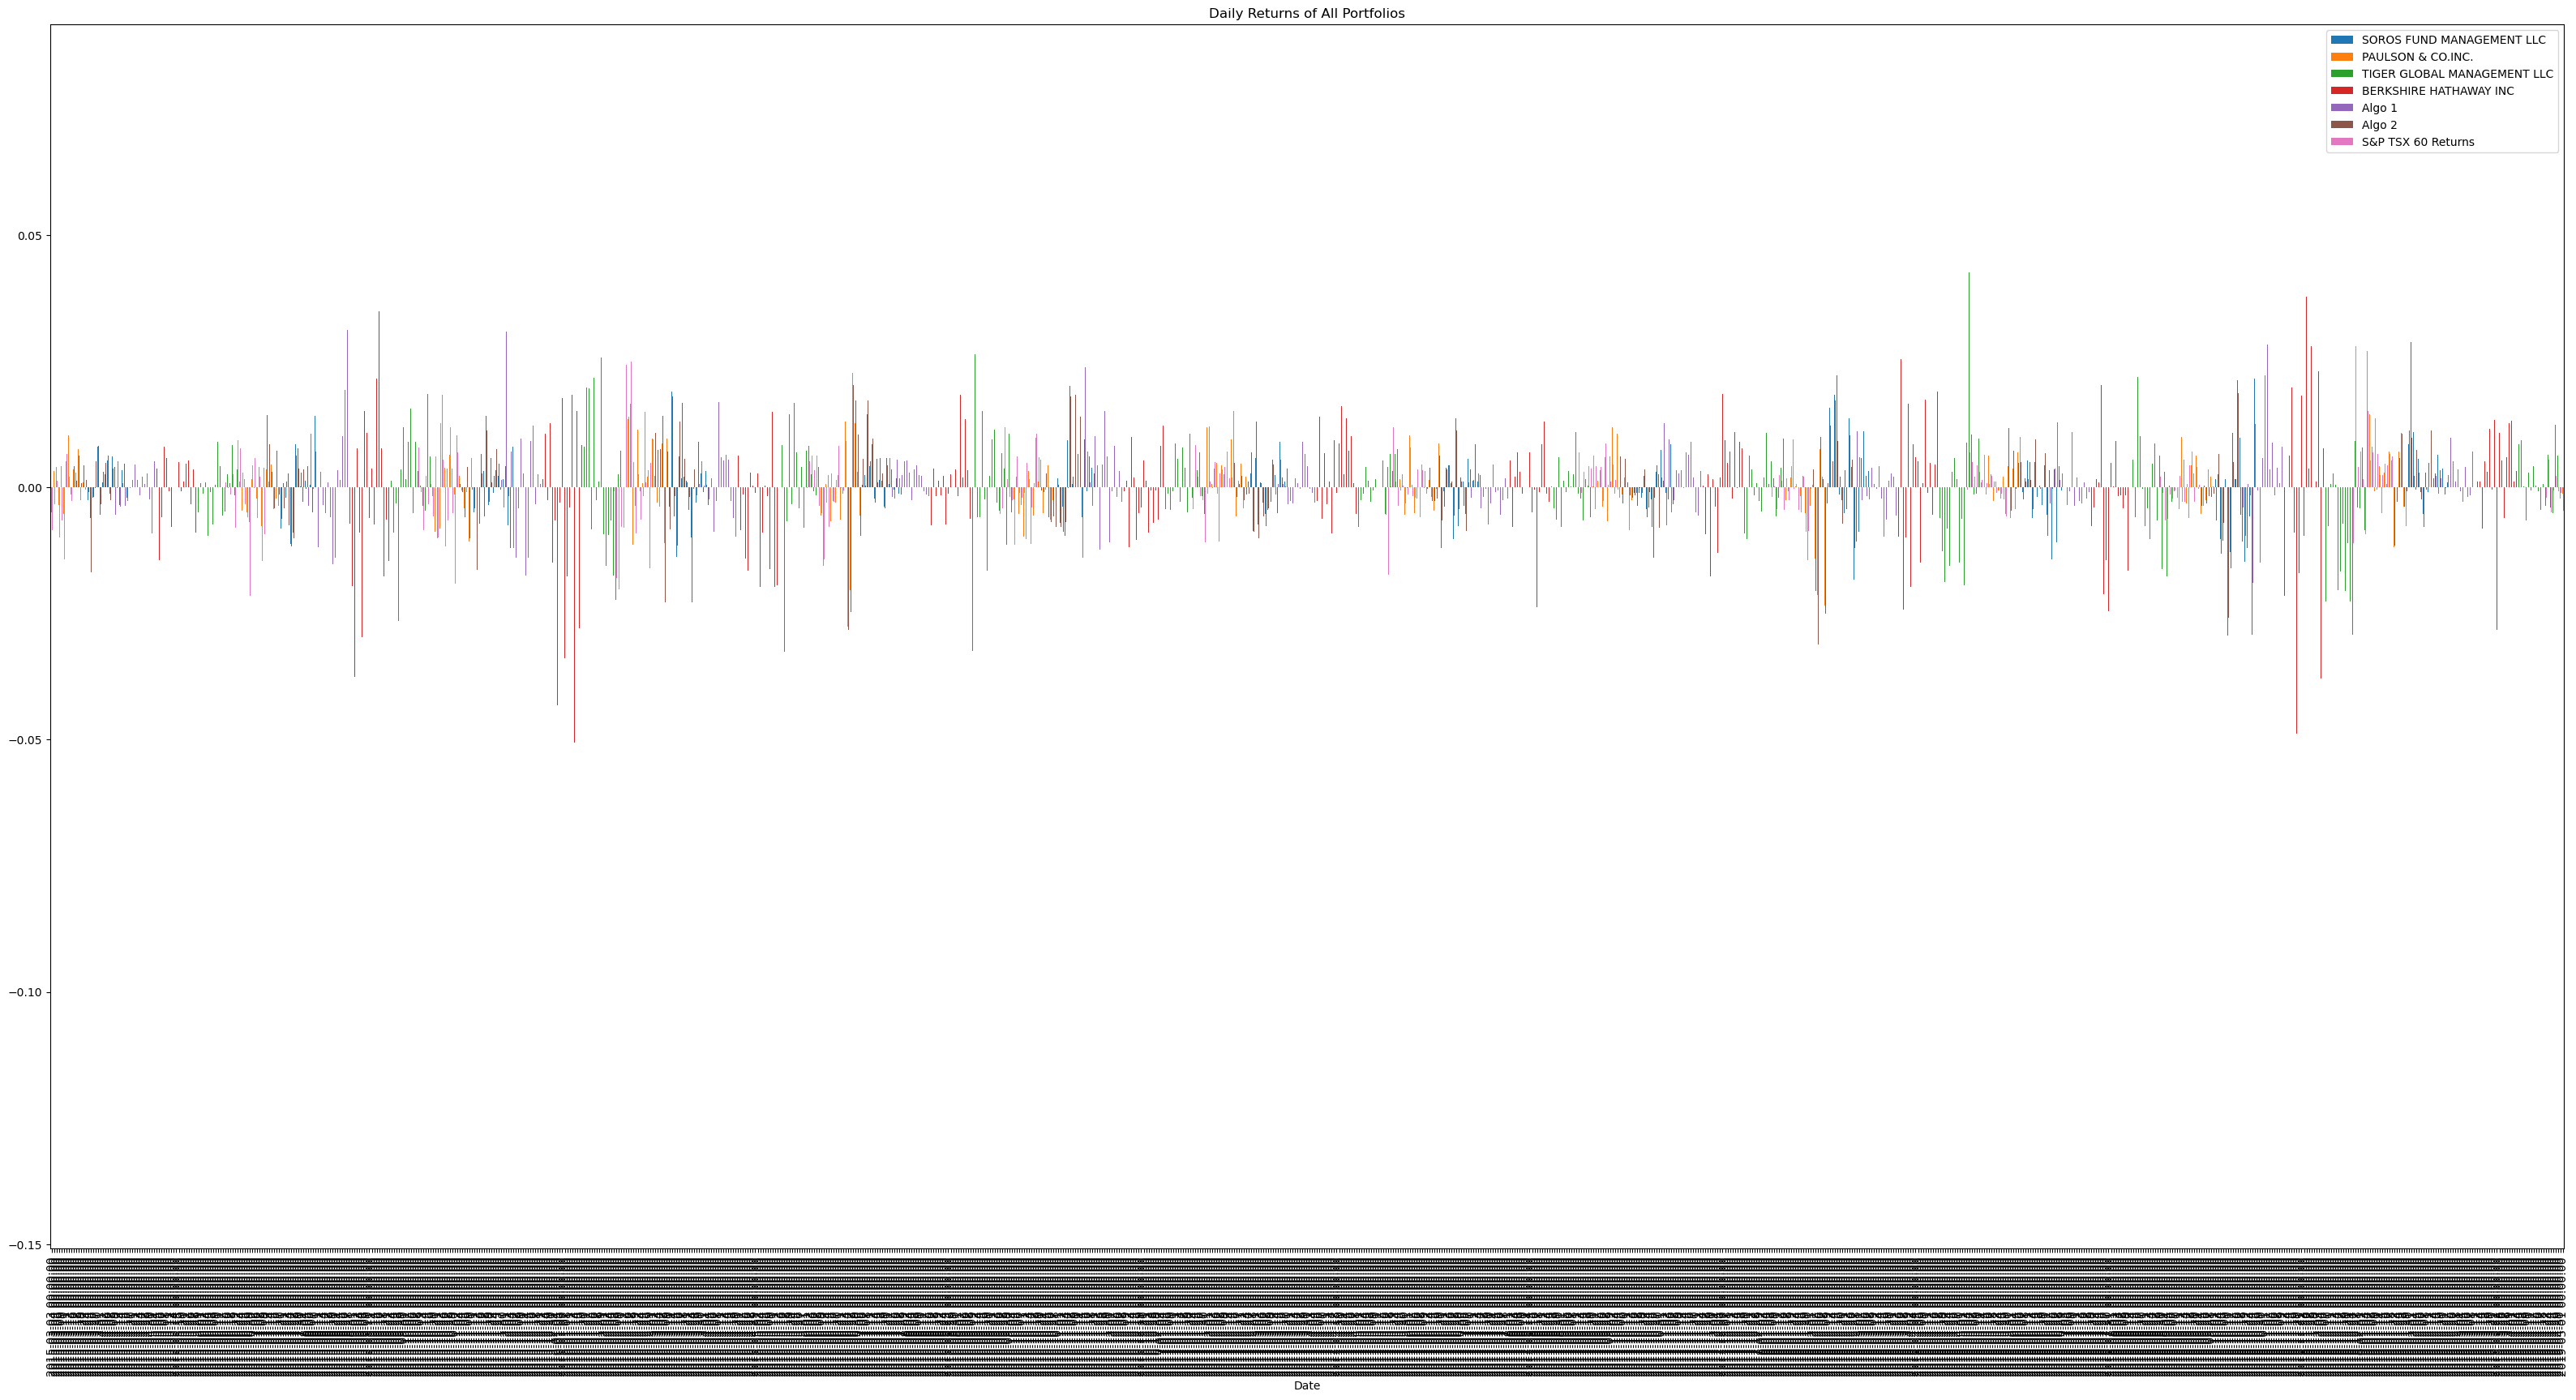

In [34]:
# CONDUCT QUANTITATIVE ANALYSIS
# Performance Analysis

# Calculate and plot daily returns of all portfolios.
combined_returns_df.plot(kind="bar", title="Daily Returns of All Portfolios", figsize=(40,20))


In [32]:
# import matplotlib.pyplot as plt
# plt.stackplot(combined_df)

# TRY TO MAKE A DUAL AXIS PLOT

#import seaborn as sns
#plt.rcParams.update({'figure.figsize':(40,20), 'figure.dpi':100})
#sns.lmplot(x='Date', y='disp', data=combined_df)
#plt.title("Daily Returns of All Portfolios")

KeyError: "None of [Index(['Date', 'disp'], dtype='object')] are in the [columns]"

Text(0.5, 1.0, 'Cumulative Returns')

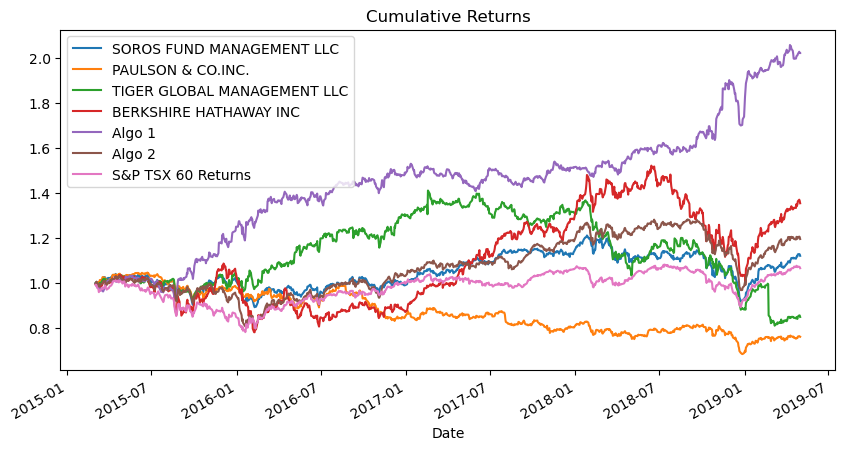

In [44]:
# Plot cumulative returns of all portfolios.
# All portfolios except fro Paulson & Co. Inc. outperform the S&P TSX 60.
cumulative_returns.plot(figsize=(10,5))
plt.title('Cumulative Returns')

Text(0, 0.5, 'Daily Returns')

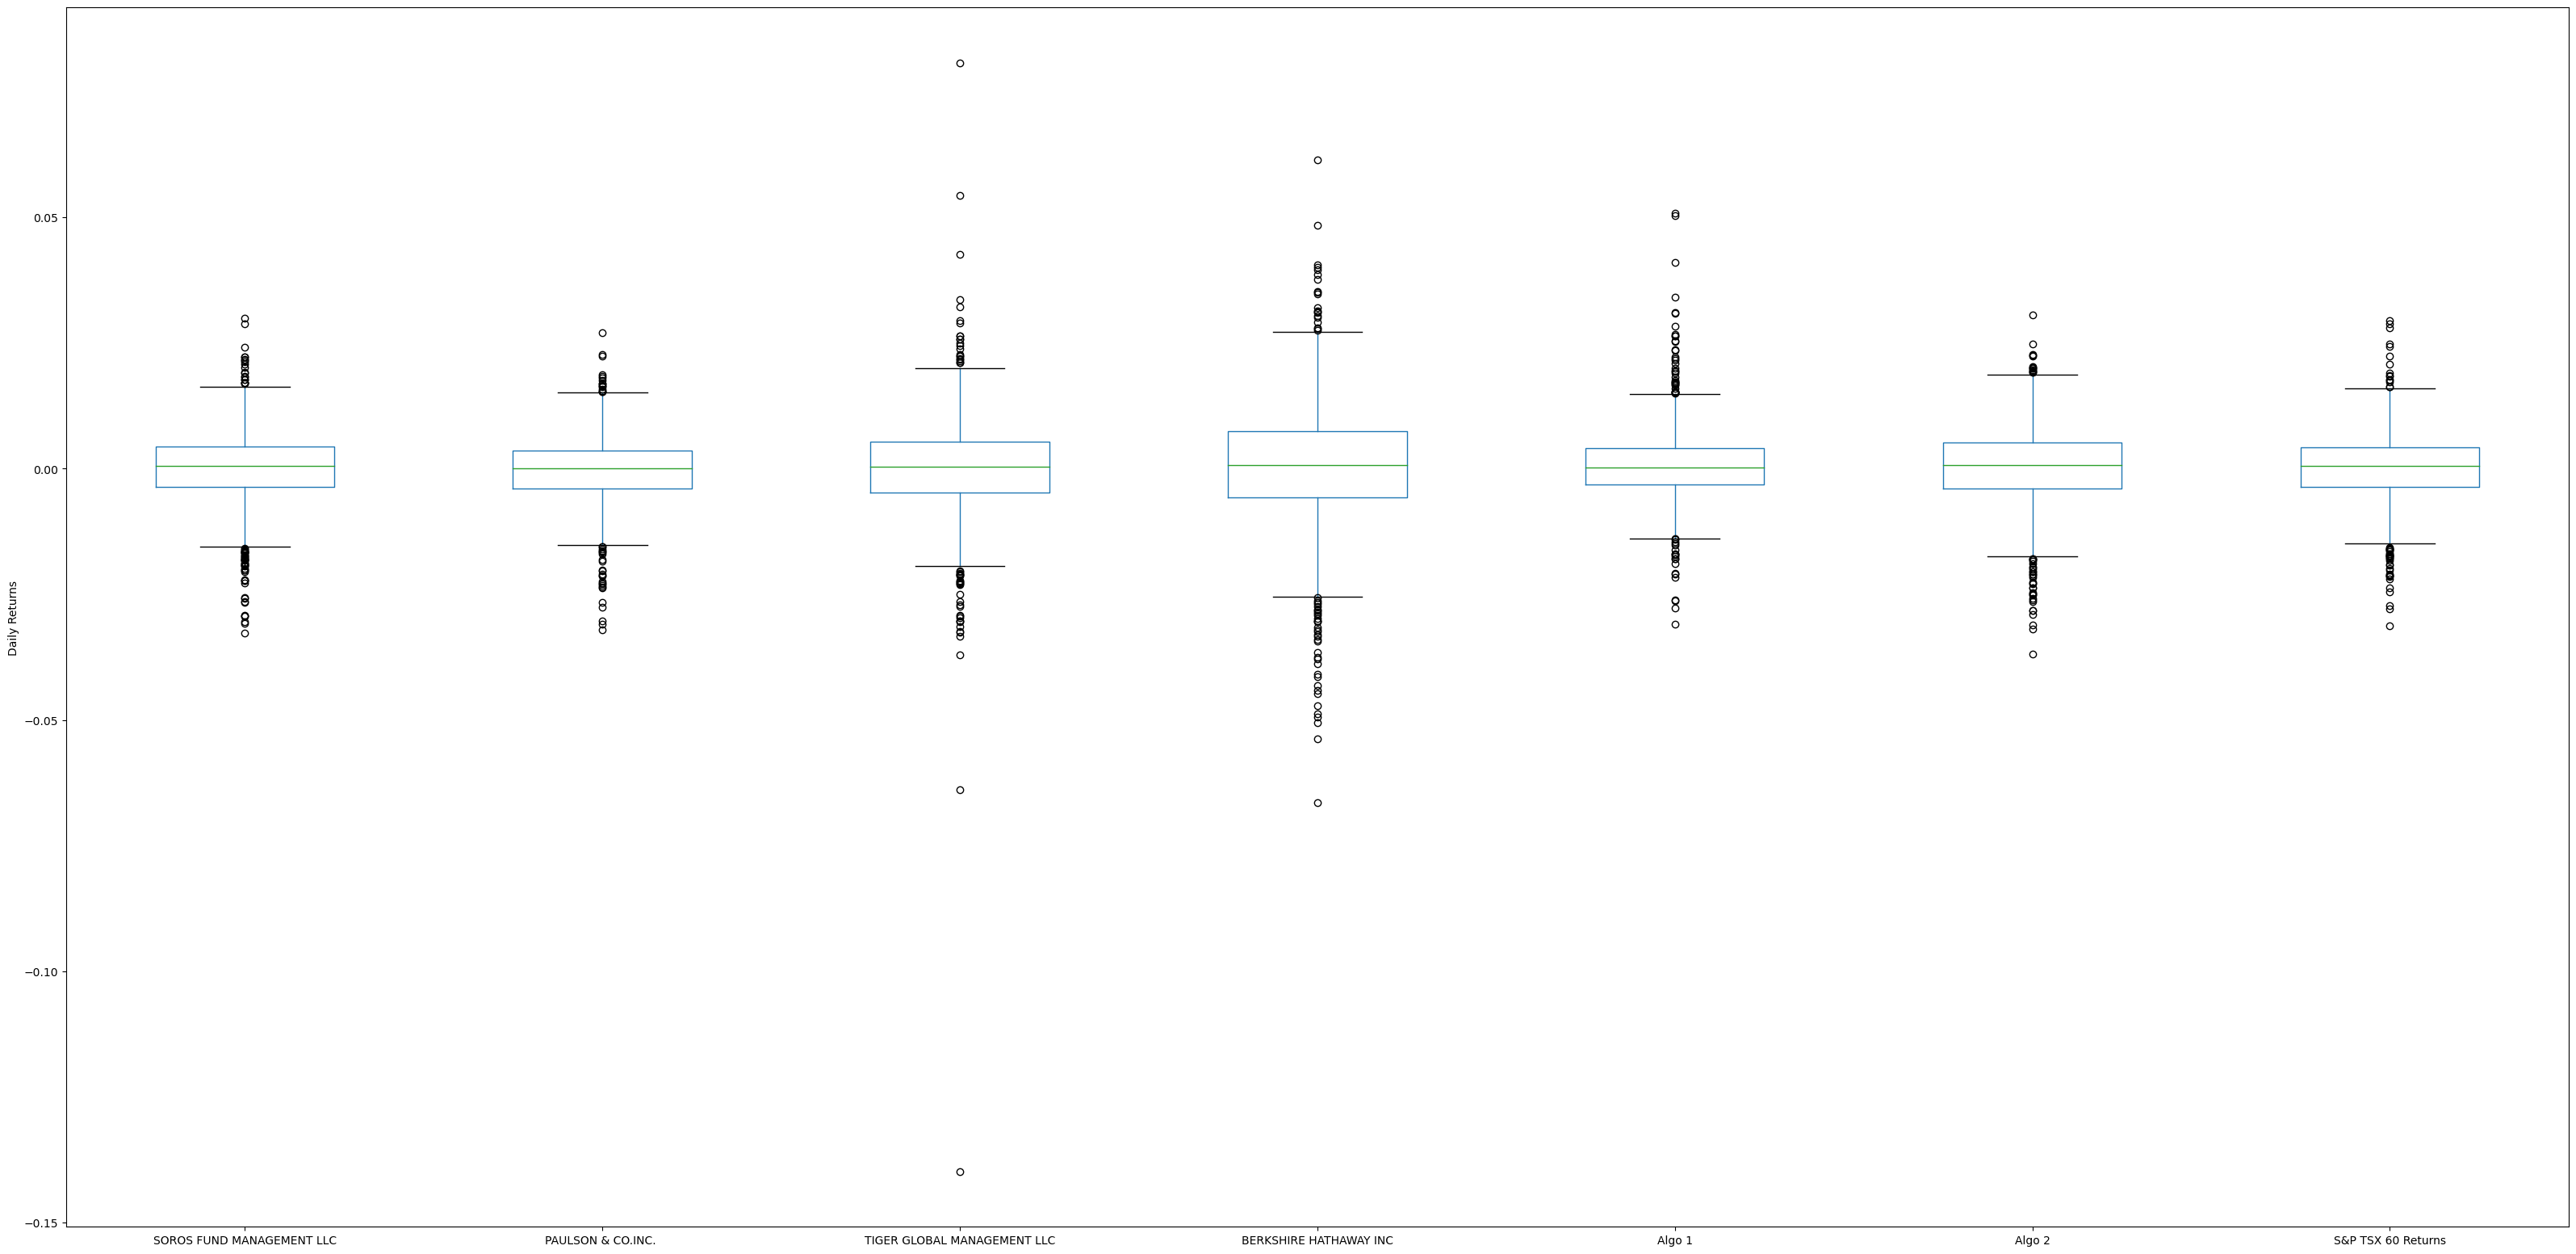

In [41]:
# Risk Analysis

# Create a box plot for each of the returns.

combined_returns_df.plot.box() 
plt.ylabel('Daily Returns')

In [51]:
# Calculate the standard deviation for each portfolio.
daily_std = combined_returns_df.std().sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX 60 Returns             0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

In [50]:
 # Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX 60 Returns             0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

In [49]:
# Determine which portfolios are riskier than the S&P TSX 

<AxesSubplot:xlabel='Date'>

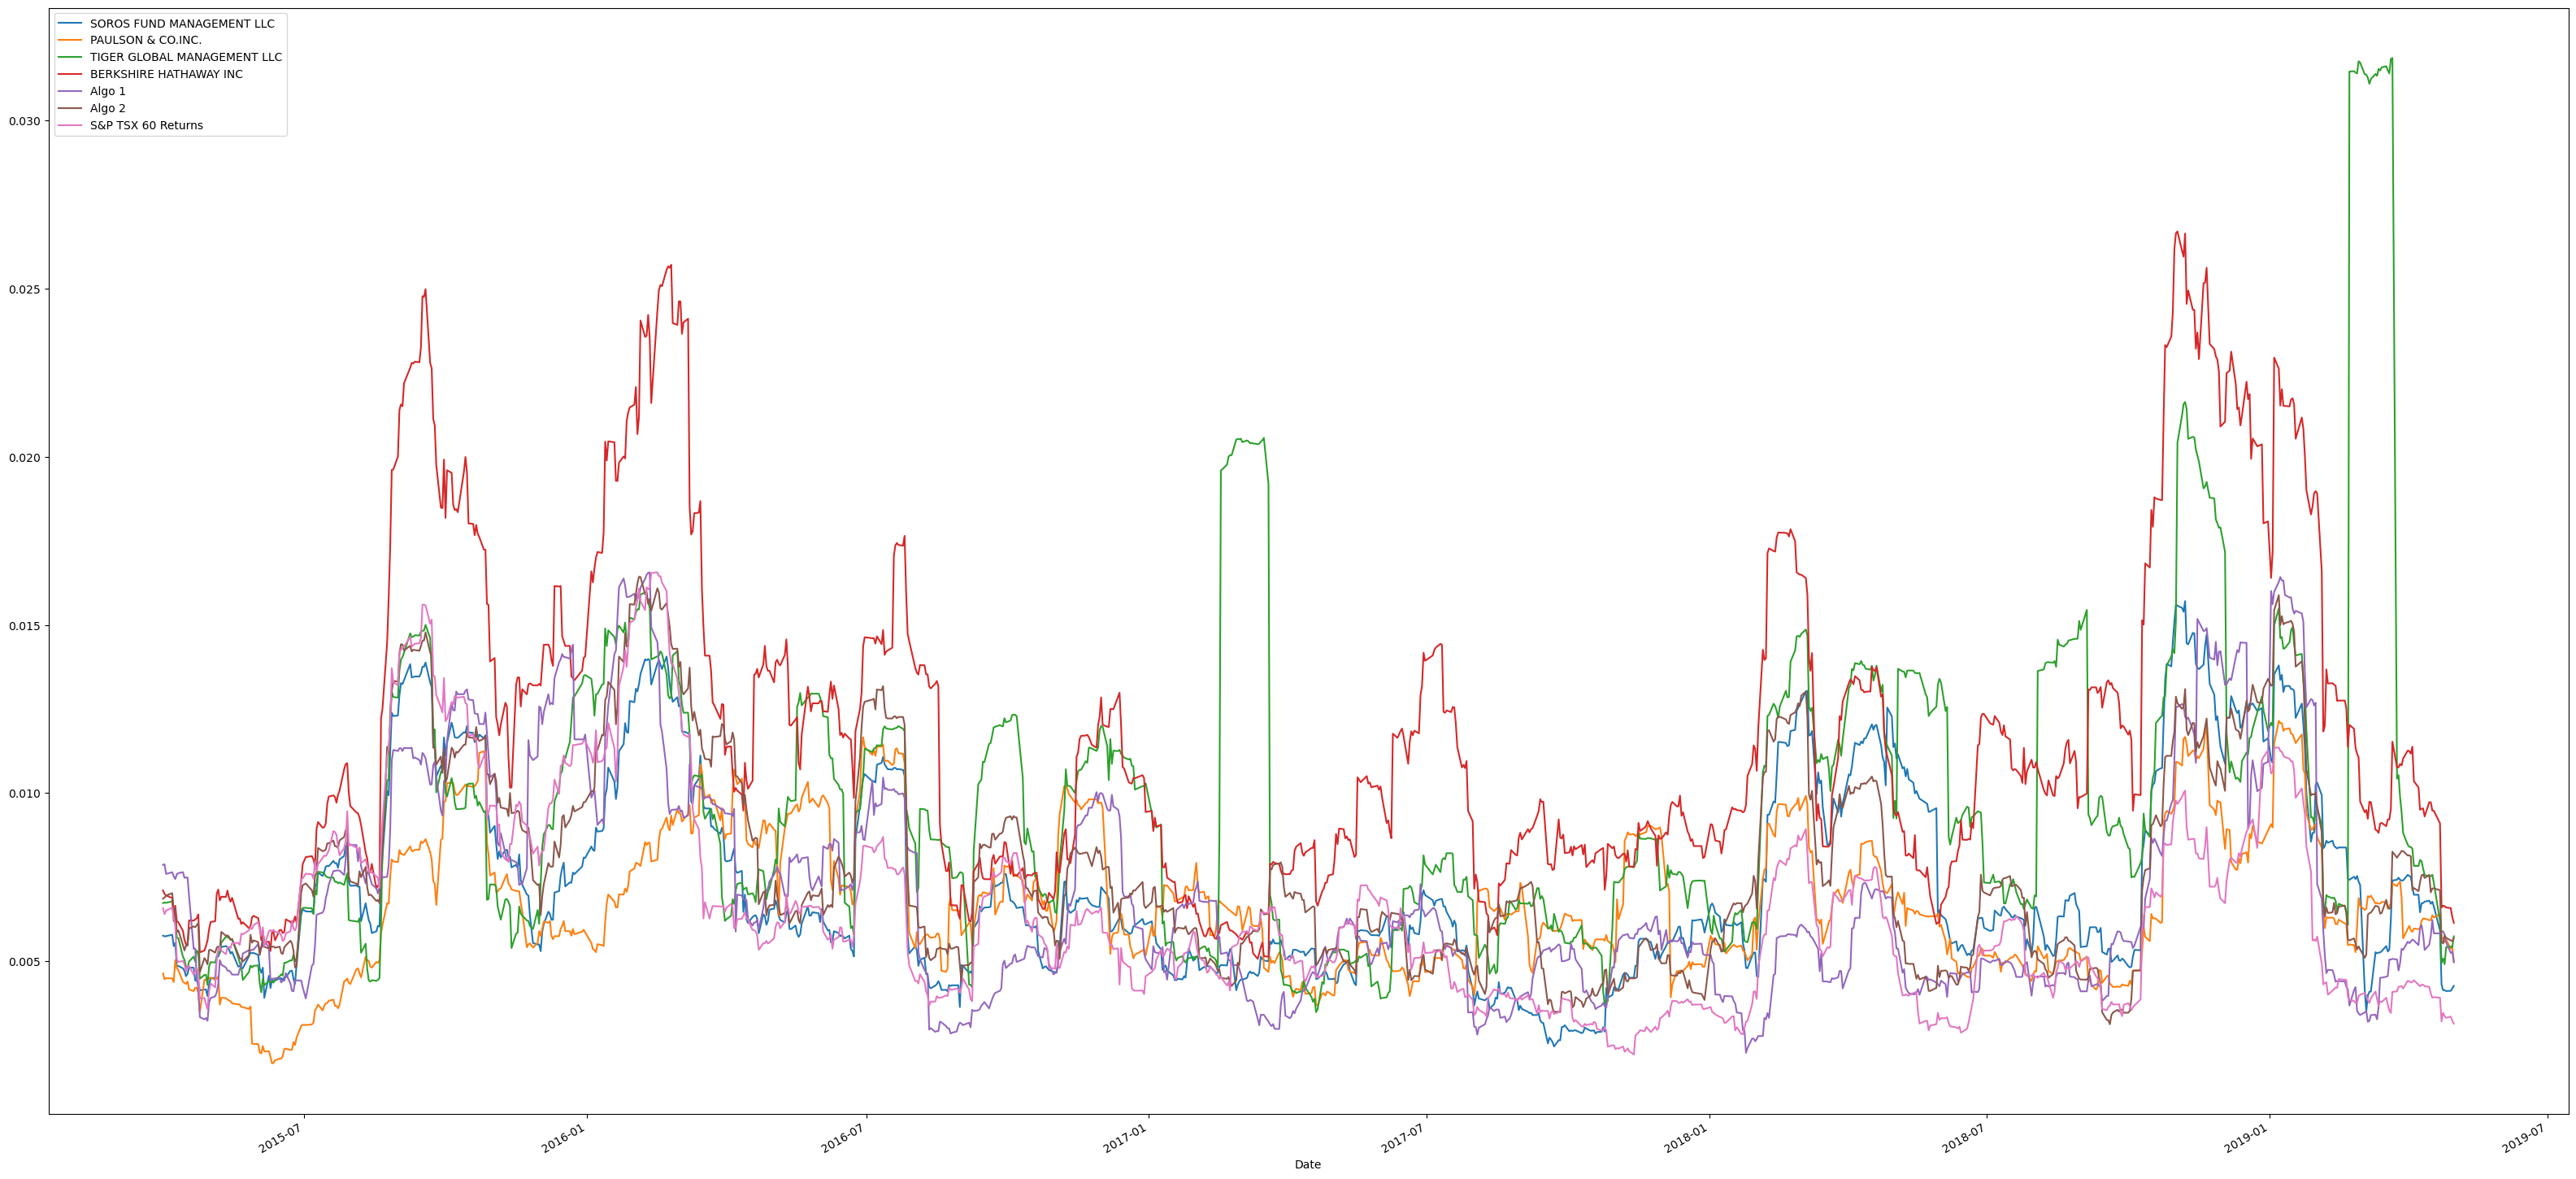

In [52]:
# Rolling Statistics
# Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
combined_returns_df.rolling(window=21).std().plot()

Text(0.5, 1.0, 'Soros vs. S&P TSX 60')

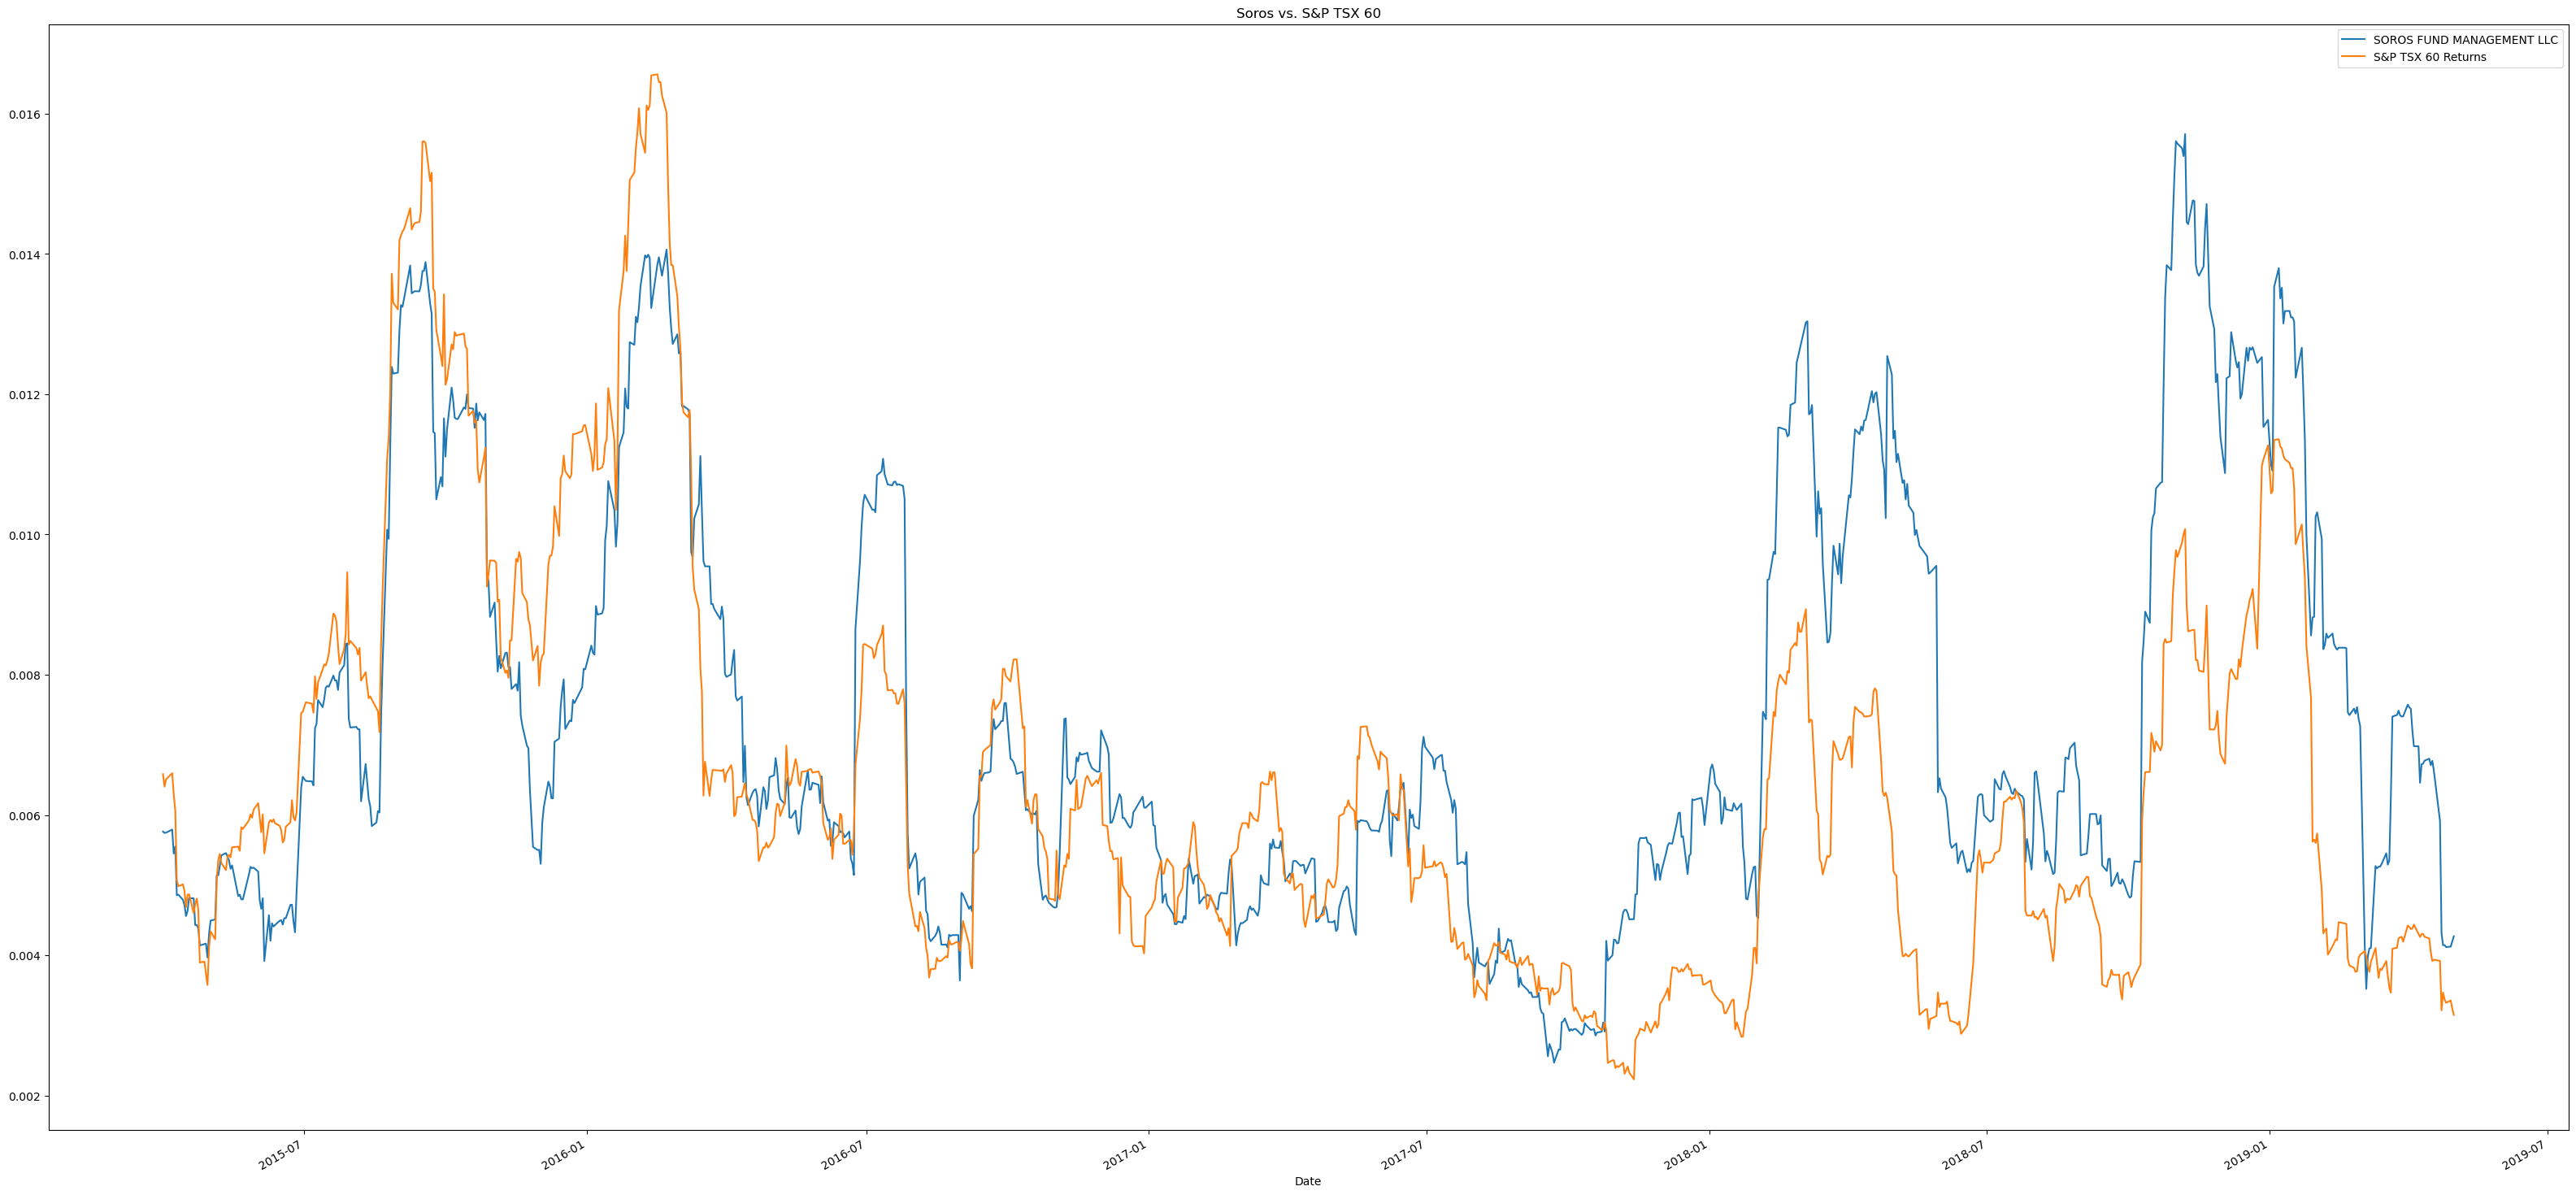

In [60]:
# A closer look: Comparisons between each portfolio and S&P TSX 60
combined_returns_df.rolling(window=21).std().plot(y=['SOROS FUND MANAGEMENT LLC','S&P TSX 60 Returns'])
plt.title('Soros vs. S&P TSX 60')

Text(0.5, 1.0, 'Paulson & Co. vs. S&P TSX 60')

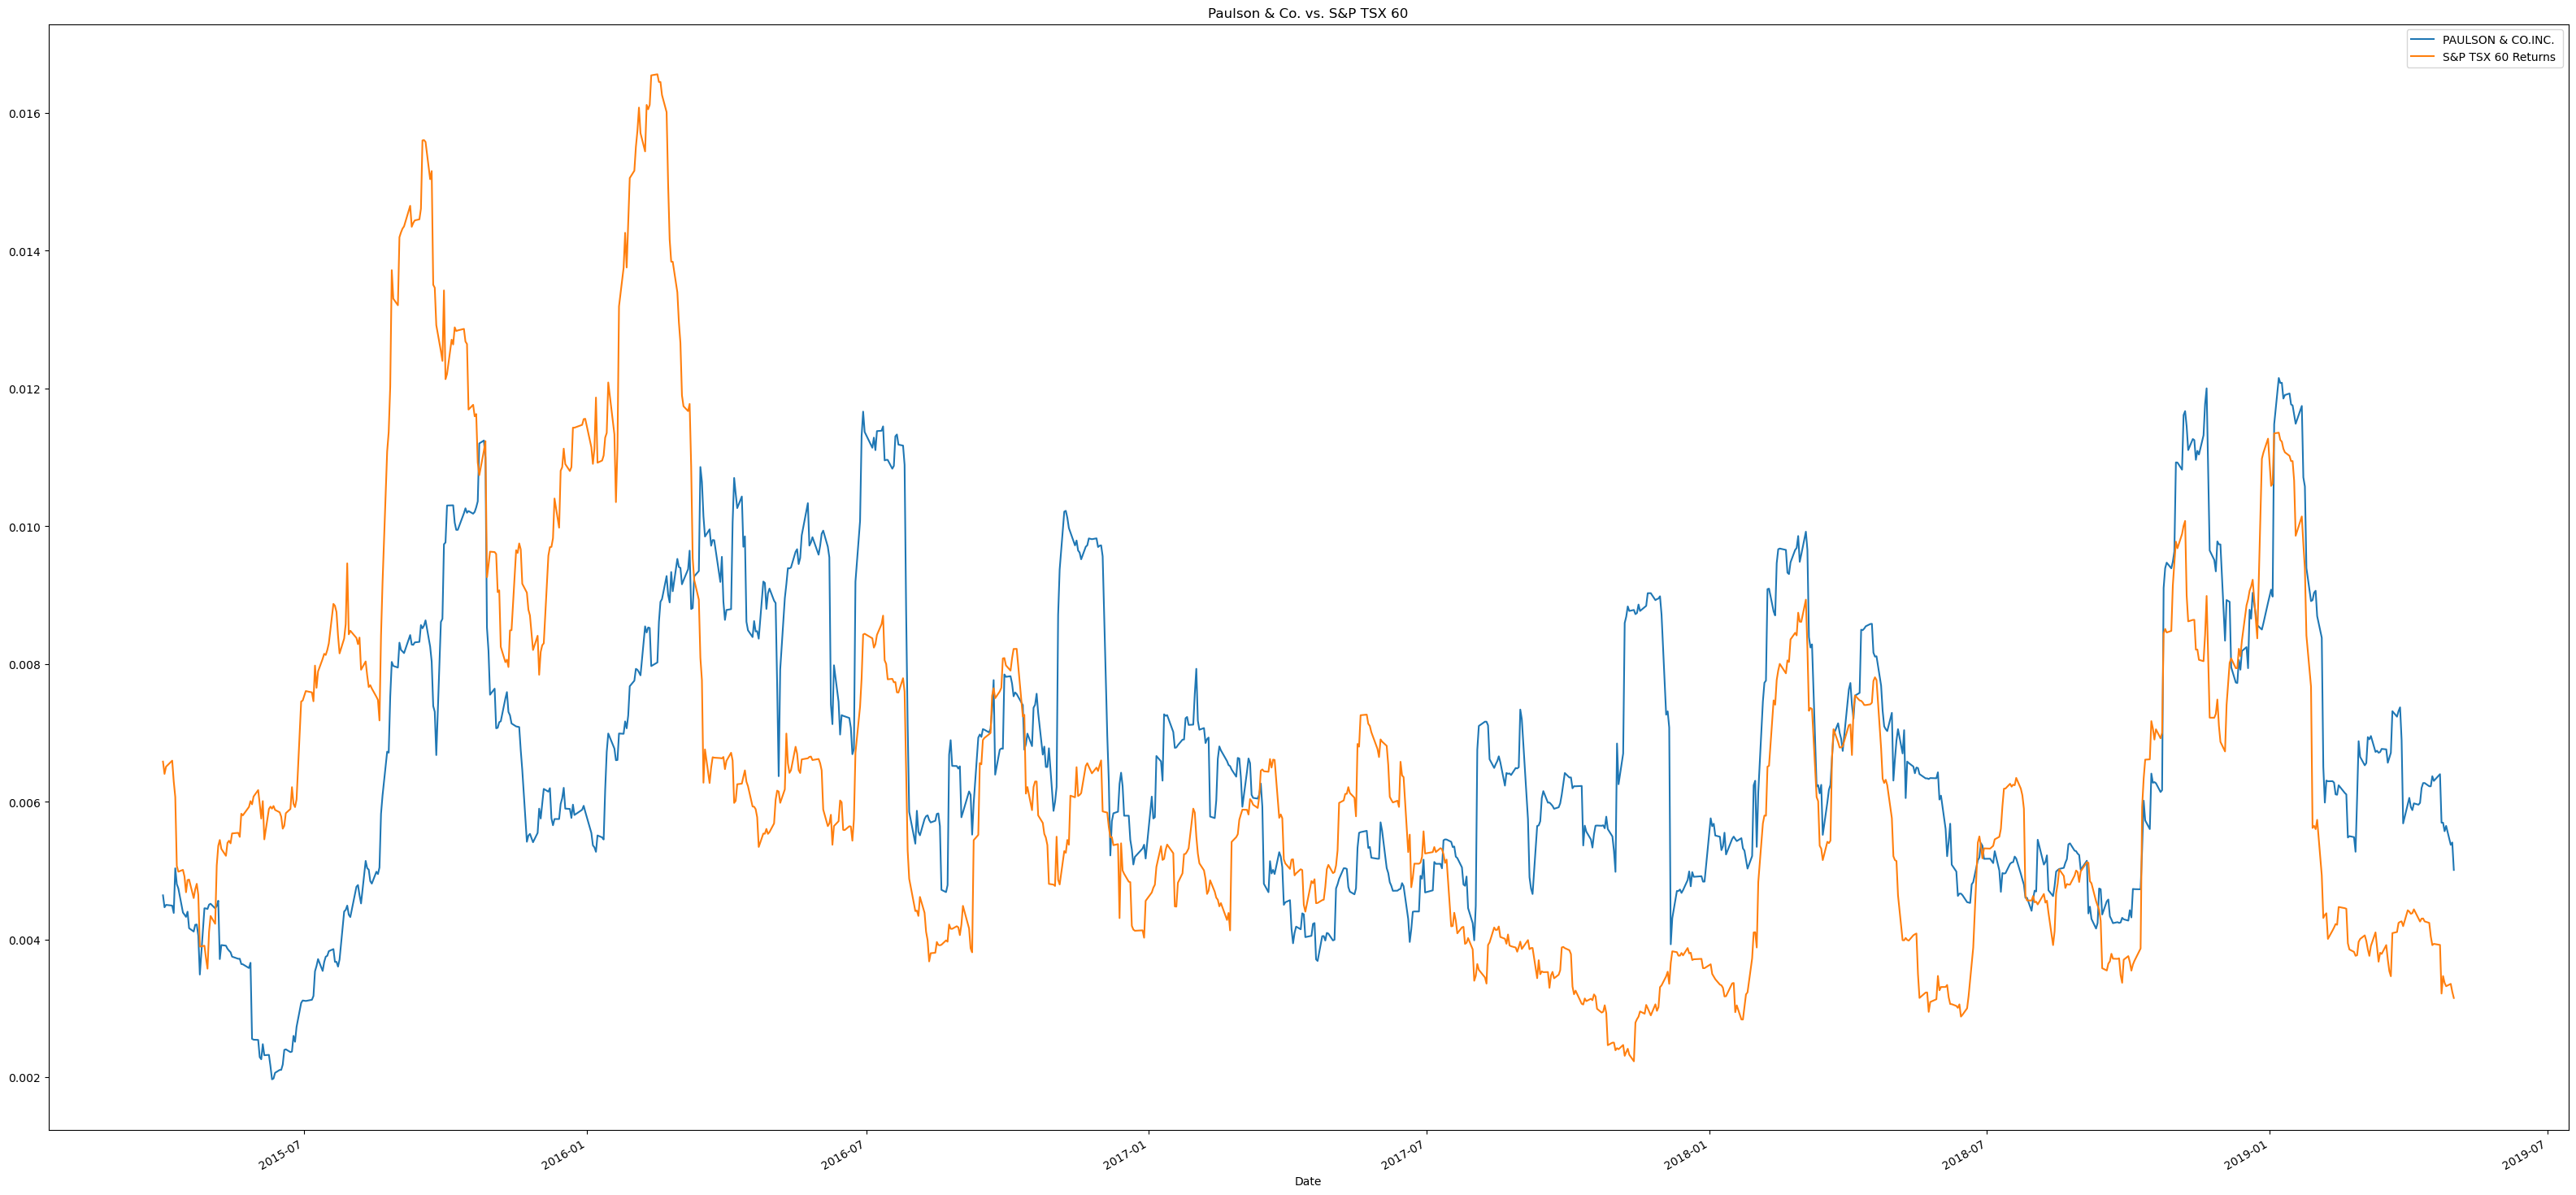

In [63]:
combined_returns_df.rolling(window=21).std().plot(y=['PAULSON & CO.INC. ','S&P TSX 60 Returns'])
plt.title('Paulson & Co. vs. S&P TSX 60')

Text(0.5, 1.0, 'Berkshire Hathaway vs. S&P TSX 60')

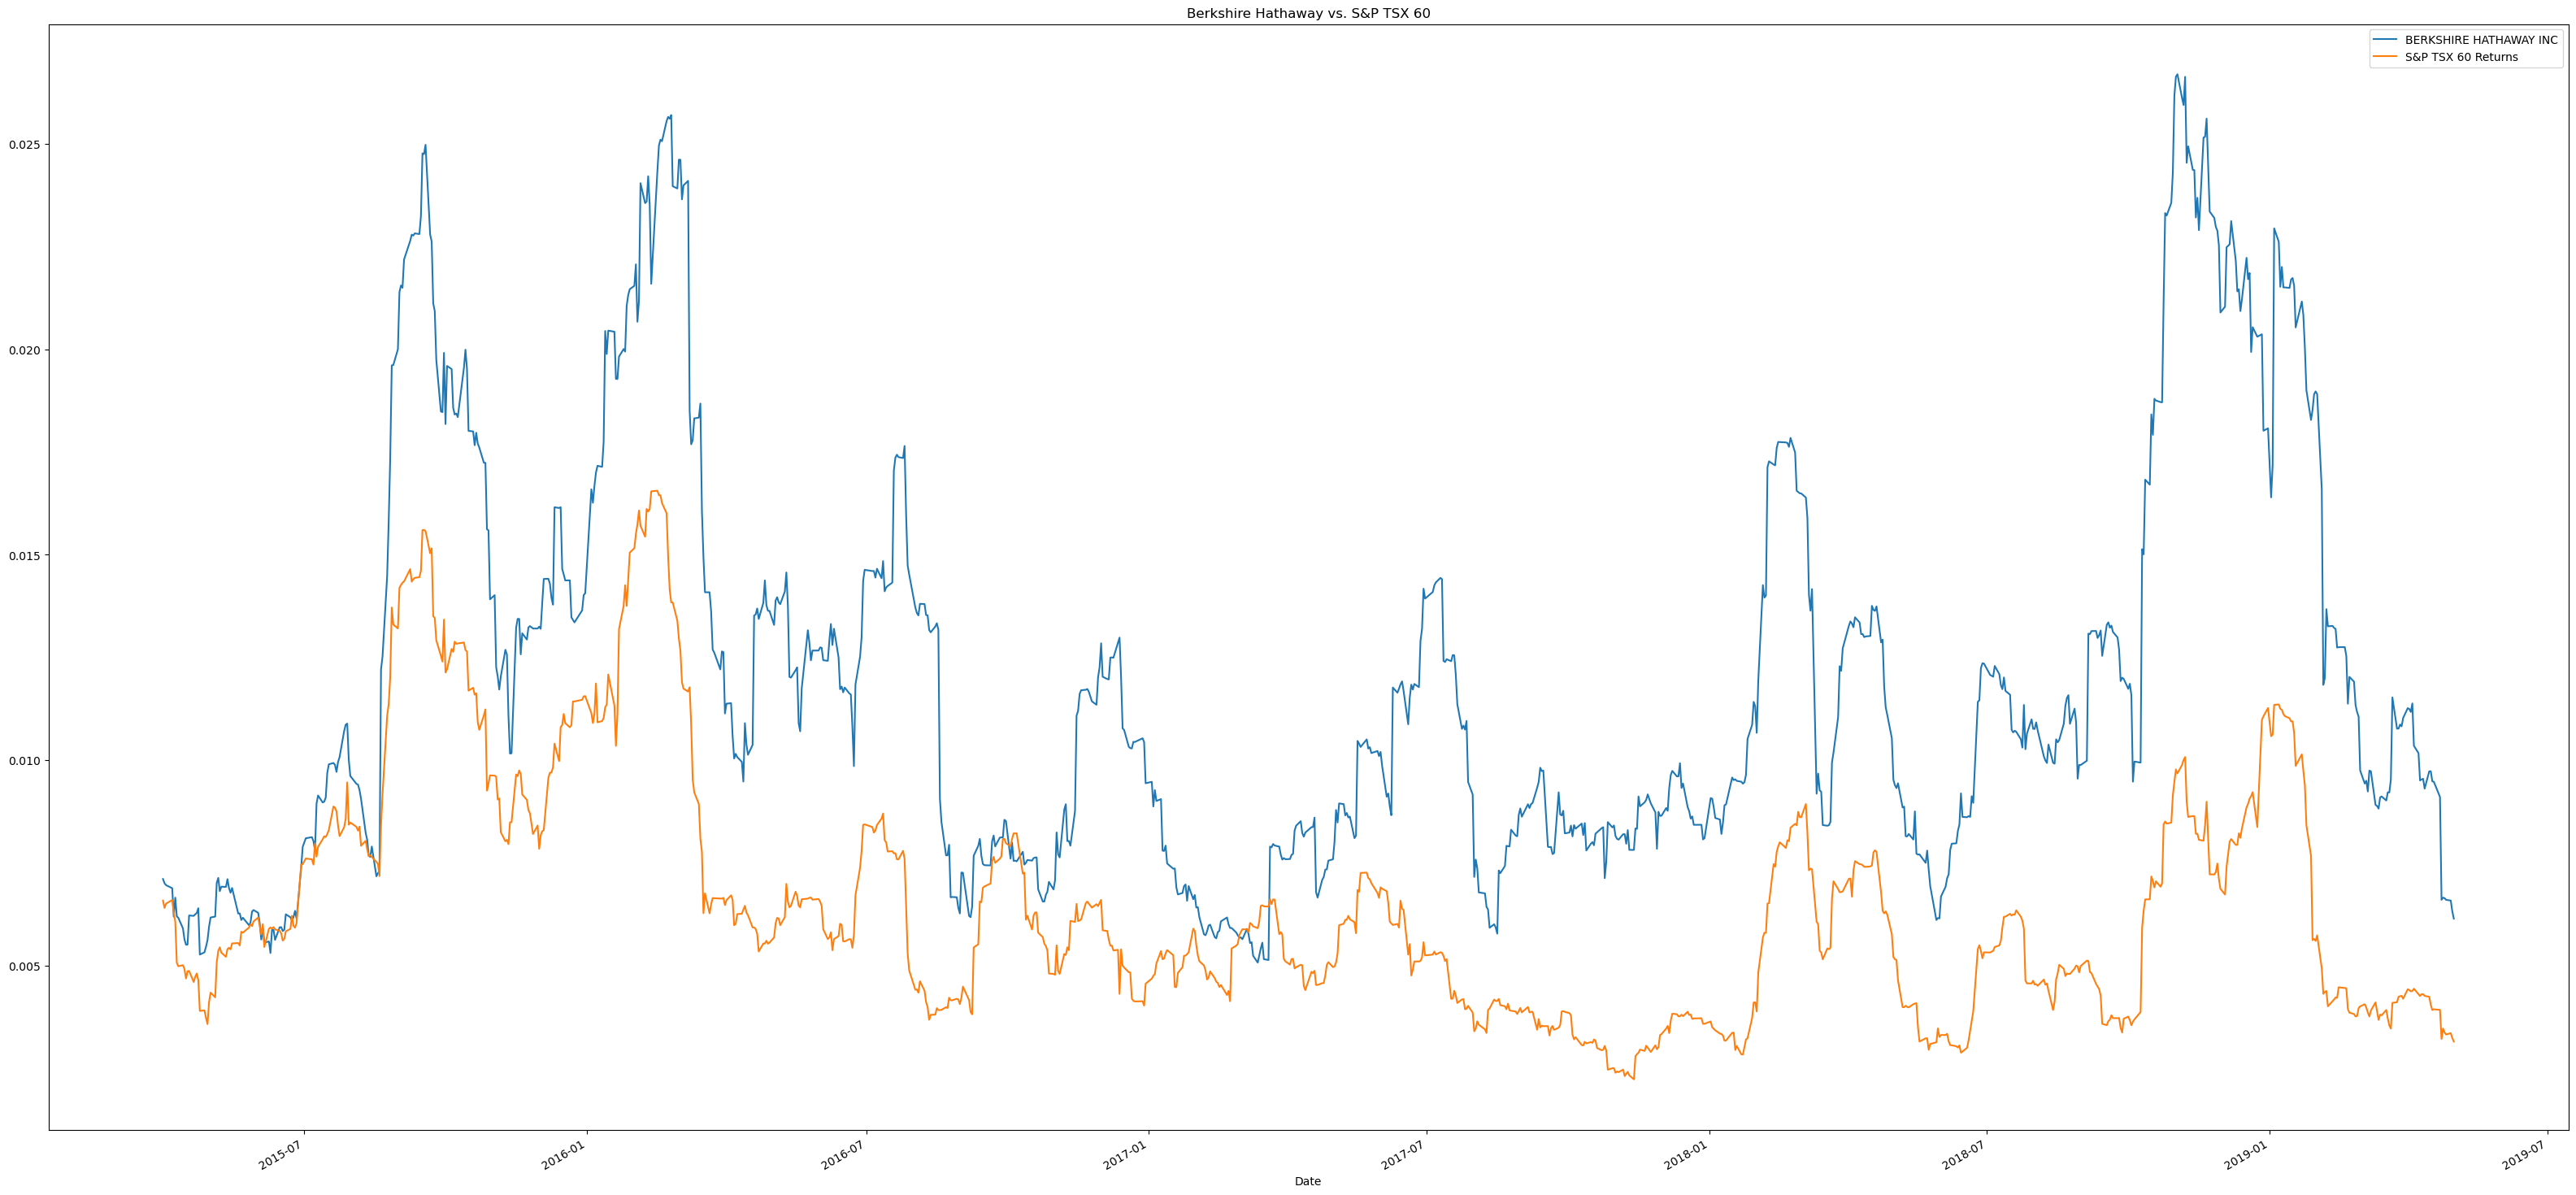

In [58]:
combined_returns_df.rolling(window=21).std().plot(y=['BERKSHIRE HATHAWAY INC','S&P TSX 60 Returns'])
plt.title('Berkshire Hathaway vs. S&P TSX 60')

Text(0.5, 1.0, 'Tiger Global vs. S&P TSX 60')

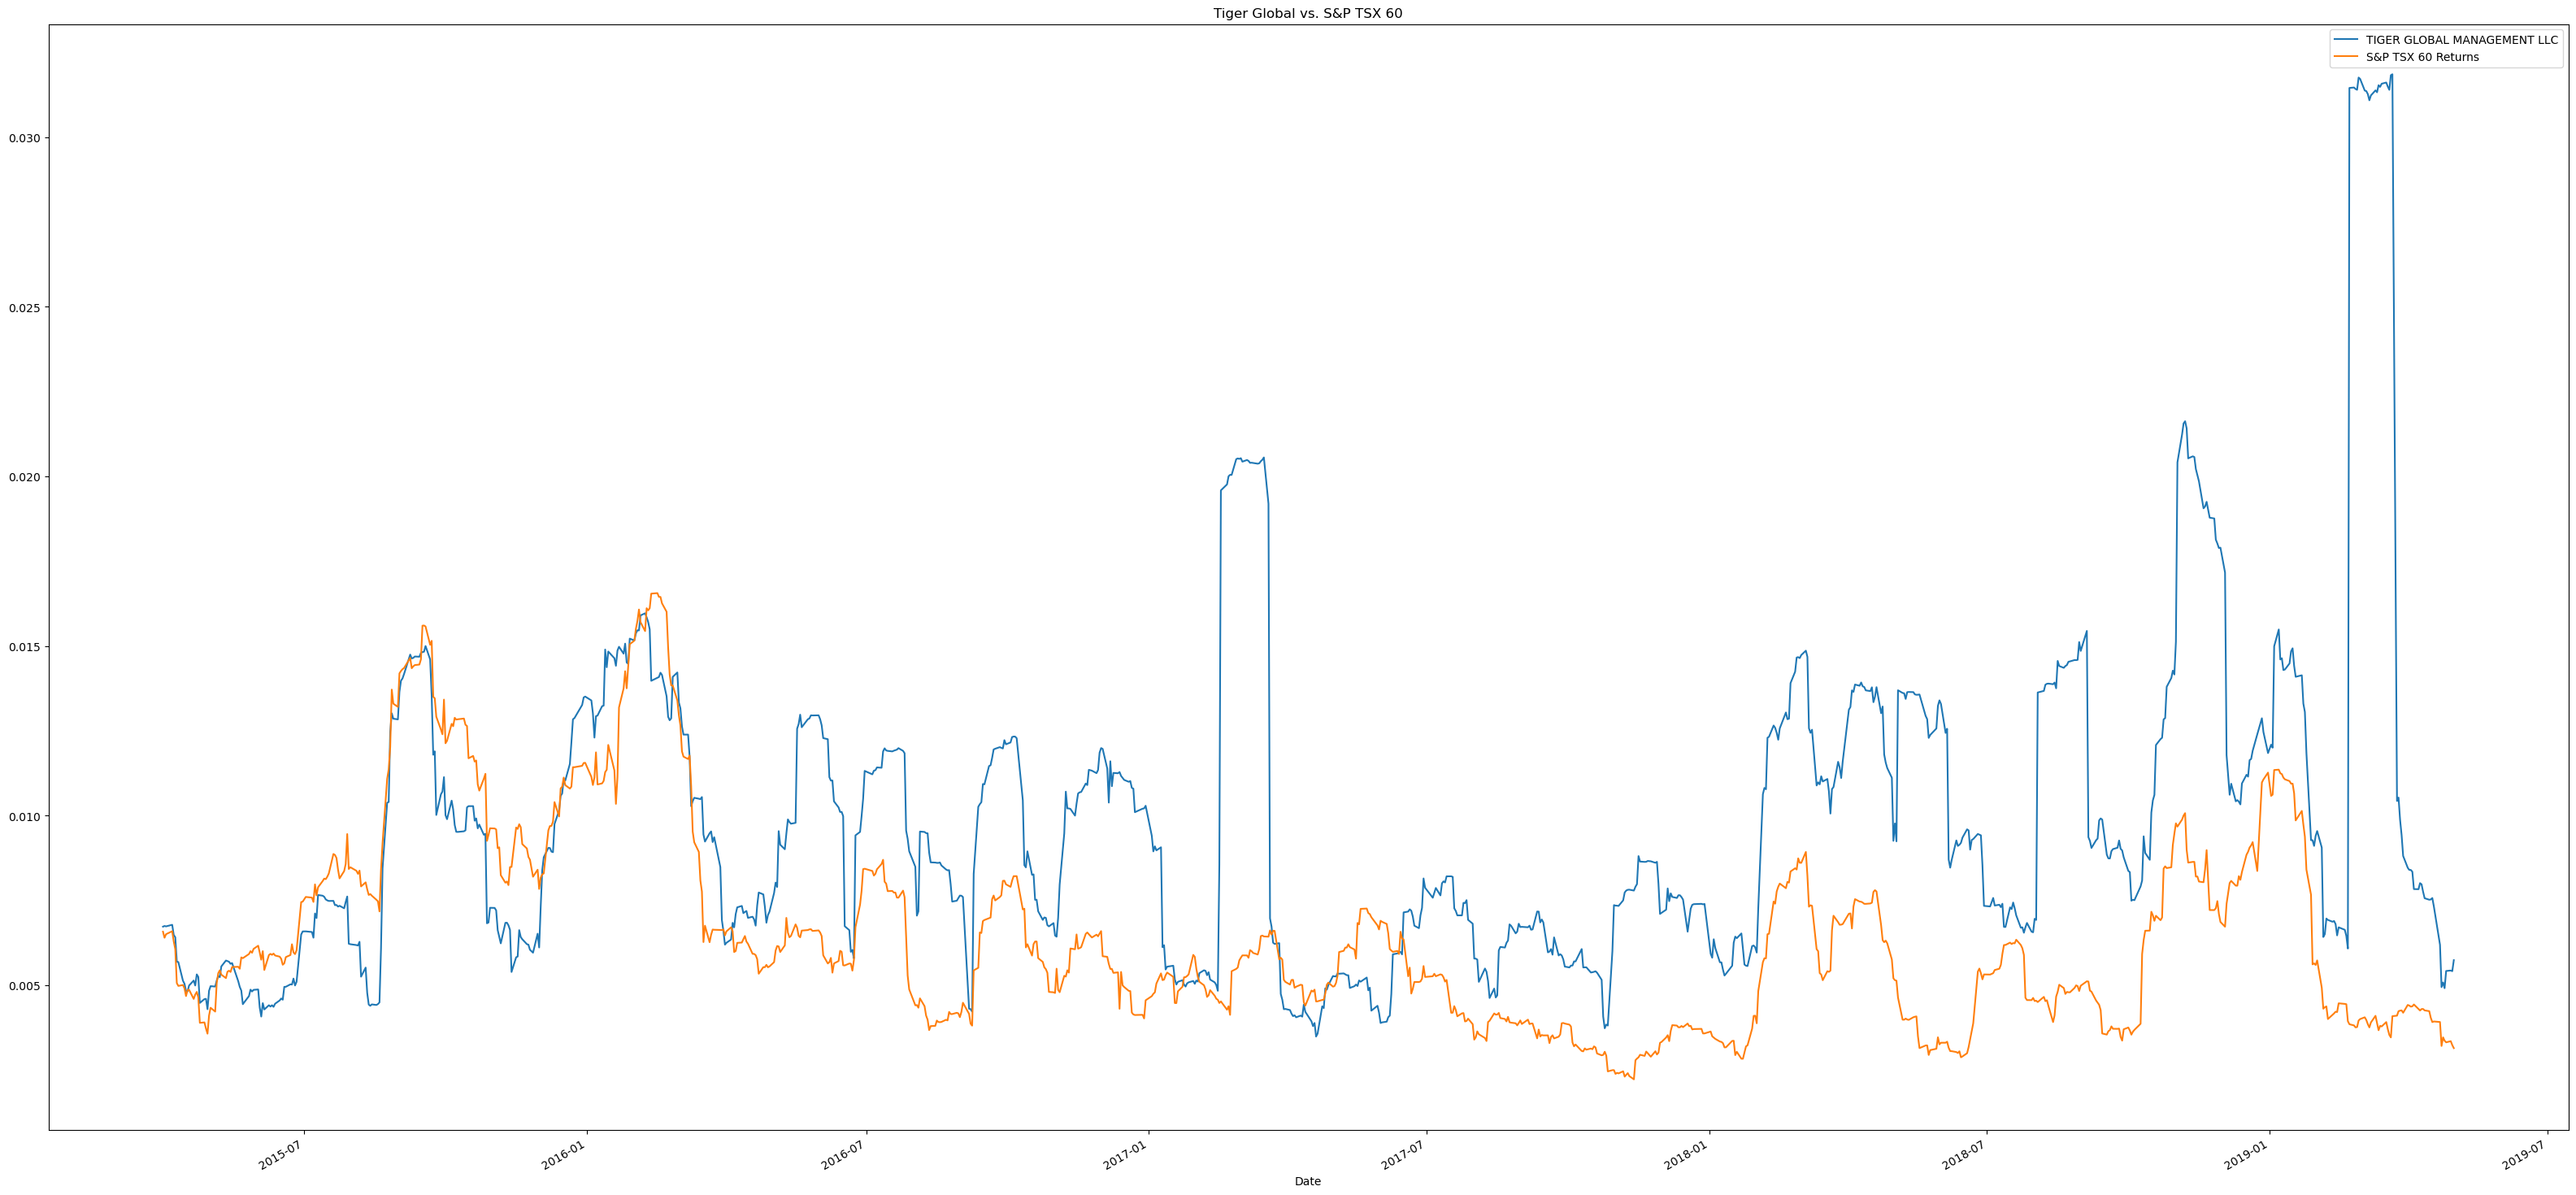

In [59]:
combined_returns_df.rolling(window=21).std().plot(y=['TIGER GLOBAL MANAGEMENT LLC','S&P TSX 60 Returns'])
plt.title('Tiger Global vs. S&P TSX 60')

Text(0.5, 1.0, 'Algo 1 vs. S&P TSX 60')

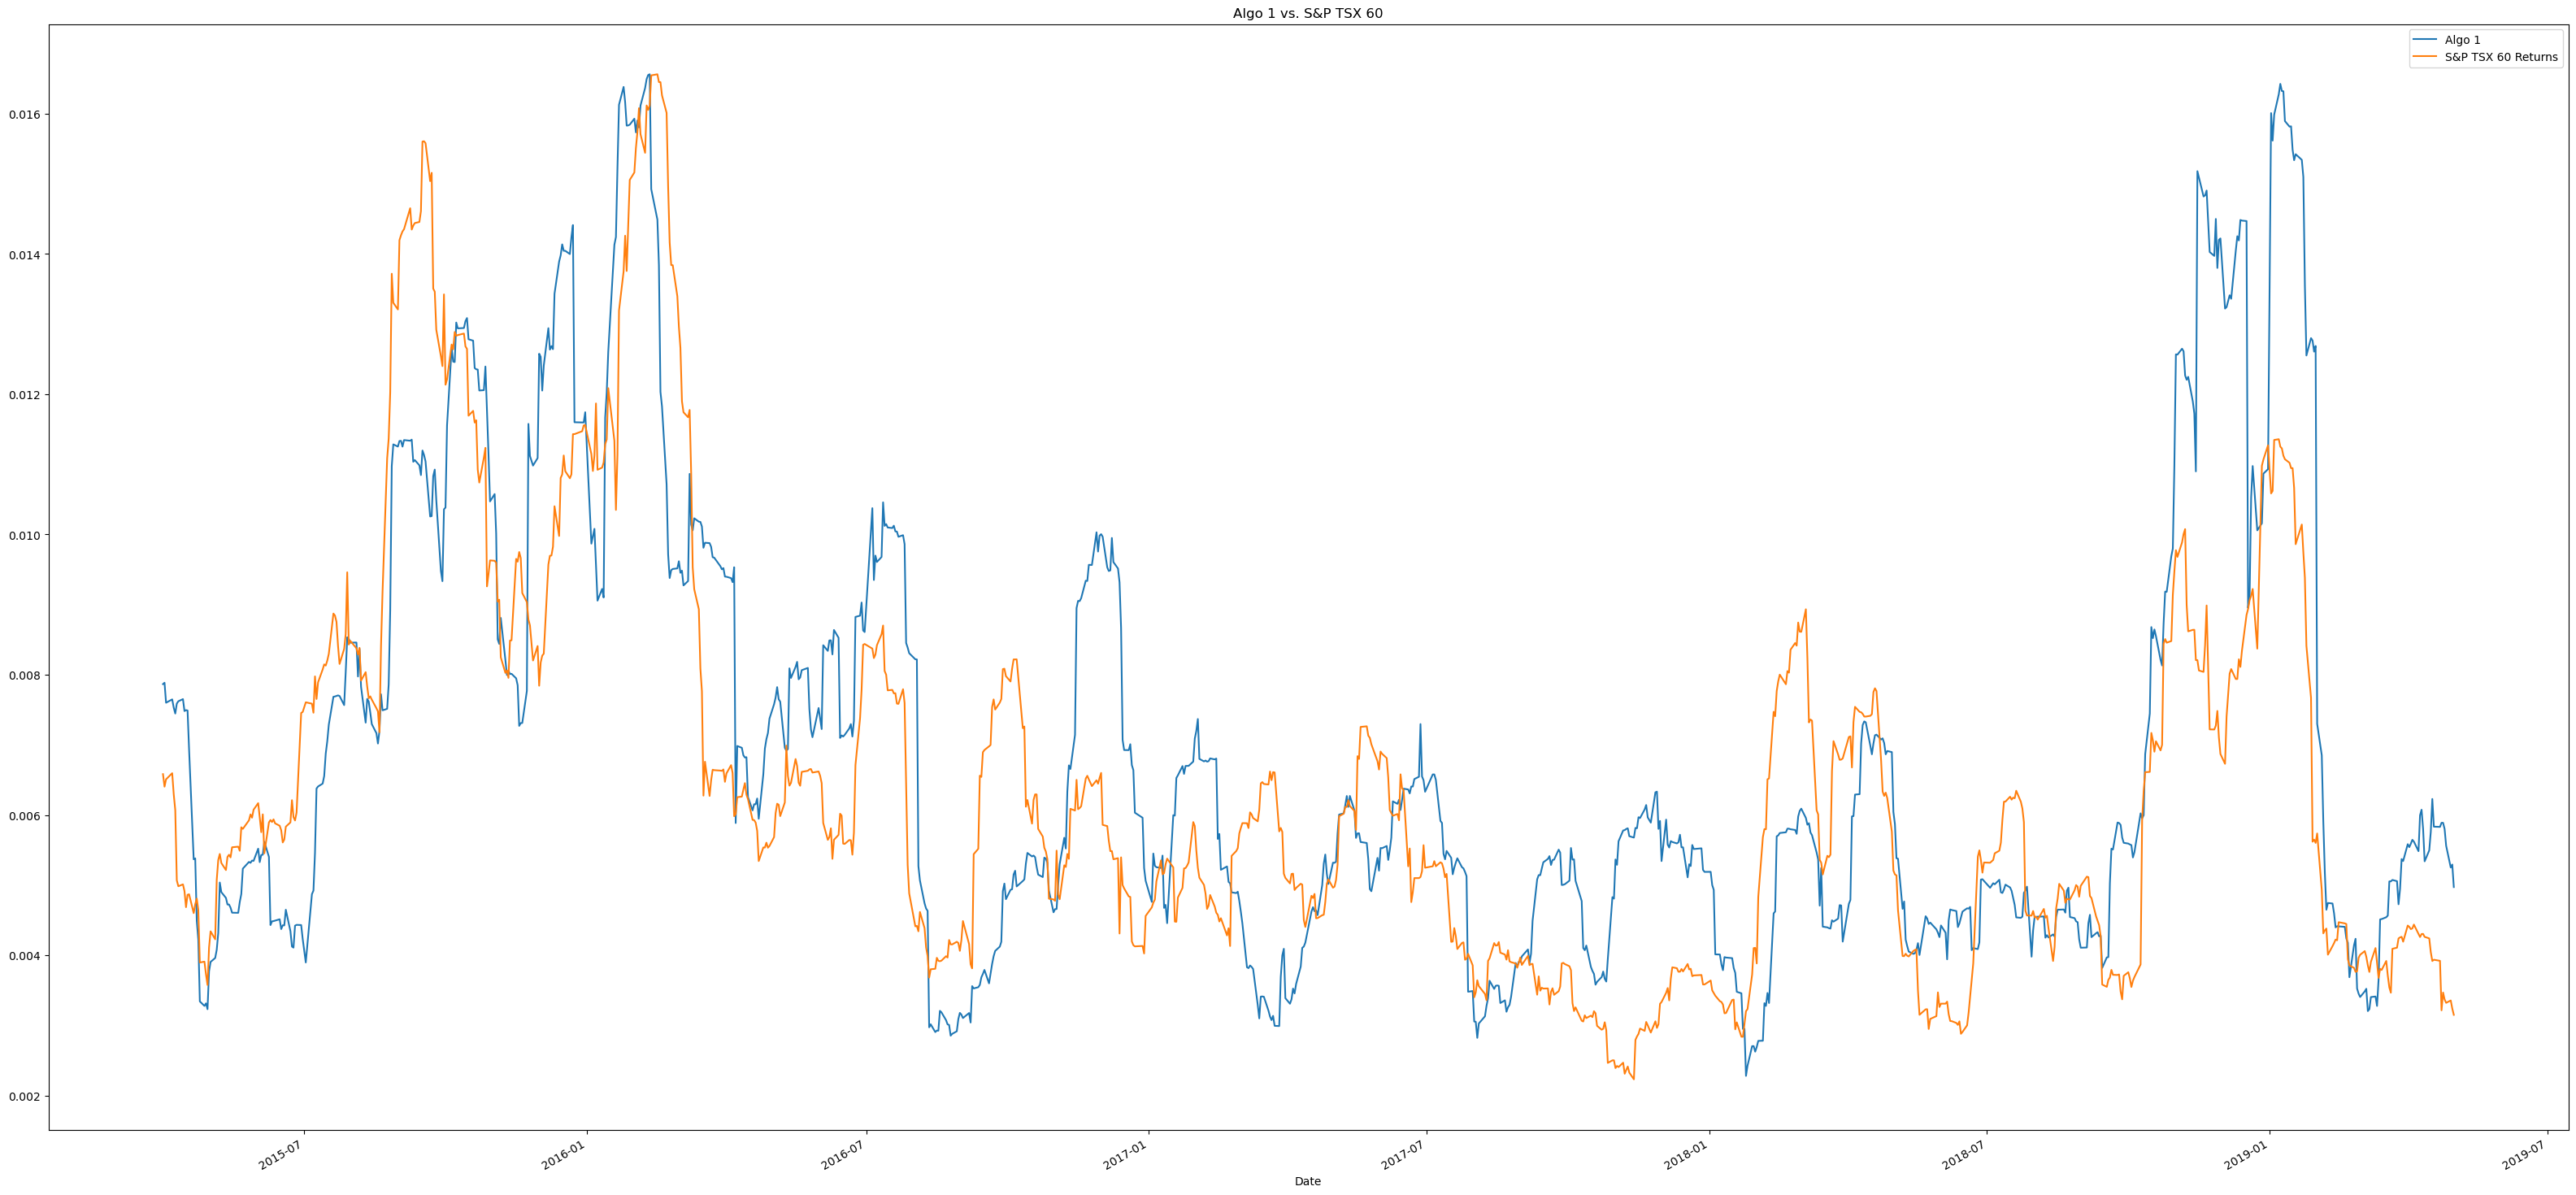

In [64]:
combined_returns_df.rolling(window=21).std().plot(y=['Algo 1','S&P TSX 60 Returns'])
plt.title('Algo 1 vs. S&P TSX 60')

Text(0.5, 1.0, 'Rolling 21-Day StdDev of Algo 2 vs. S&P TSX 60')

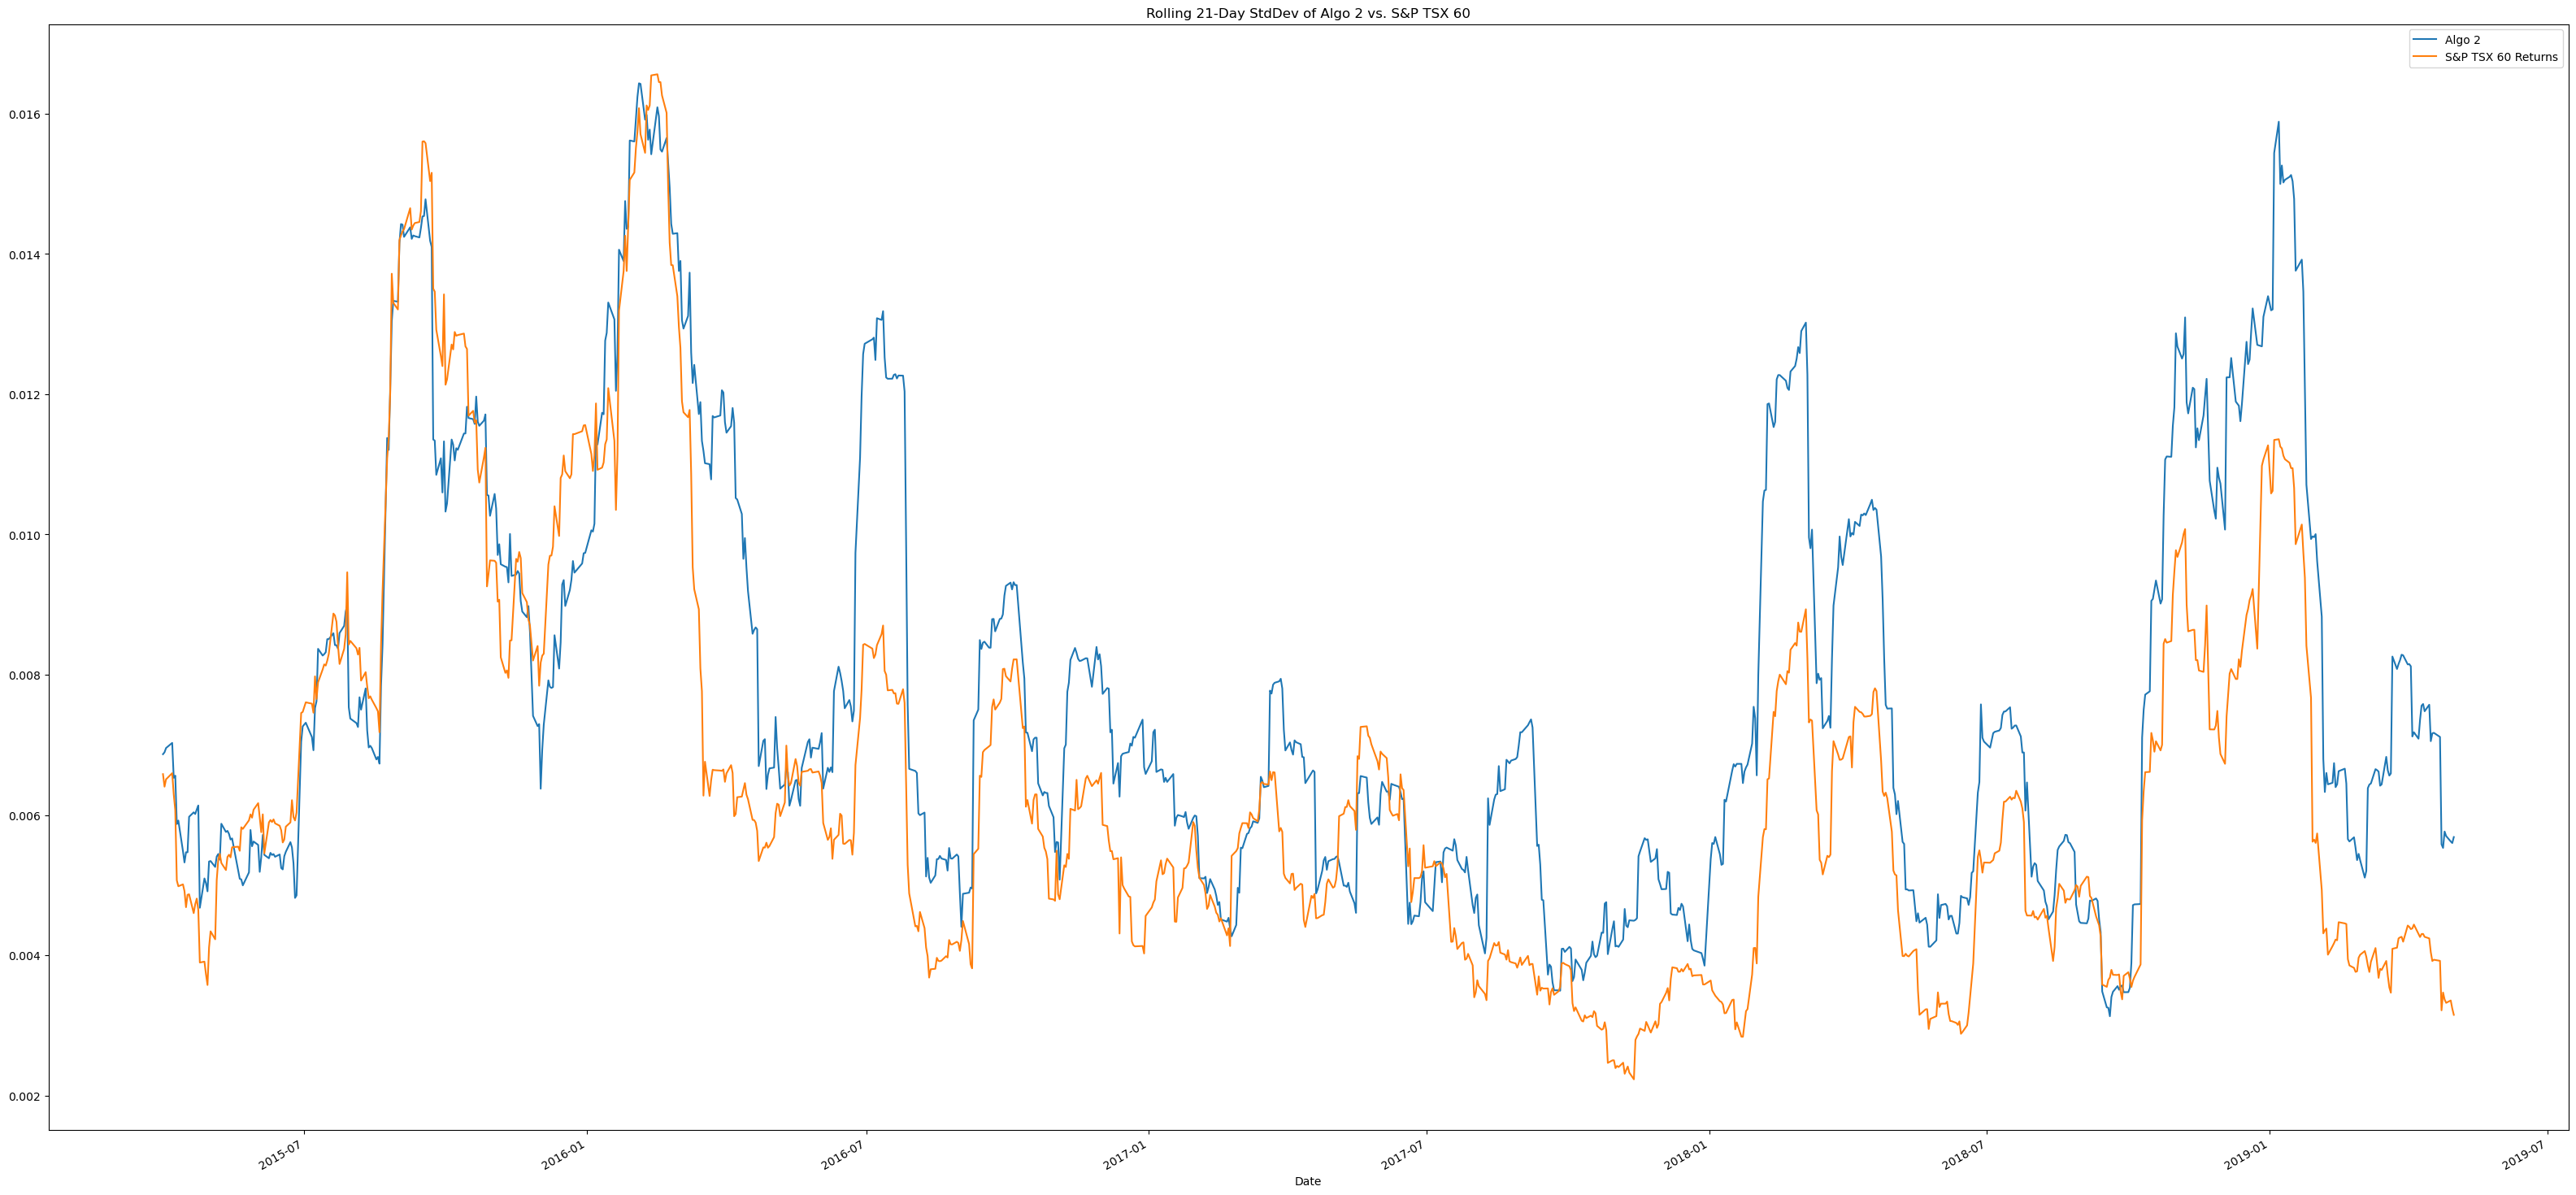

In [68]:
combined_returns_df.rolling(window=21).std().plot(y=['Algo 2','S&P TSX 60 Returns'])
plt.title('Rolling 21-Day StdDev of Algo 2 vs. S&P TSX 60')

In [71]:
# Calculate and plot the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
correlation = combined_returns_df.corr()
correlation

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.697076   
PAULSON & CO.INC.                             0.697076            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.560964            0.433034   
BERKSHIRE HATHAWAY INC                        0.750181            0.540033   
Algo 1                                        0.313795            0.266363   
Algo 2                                        0.826667            0.674015   
S&P TSX 60 Returns                            0.673930            0.486511   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.560964   
PAULSON & CO.INC.                               0.433034   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.423524   
Algo 1                                          0.161236   
Algo 2                                          0.506689   
S&P TSX 60 Returns                              0.440583   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.750181  0.313795  0.826667   
PAULSON & CO.INC.                          0.540033  0.266363  0.674015   
TIGER GLOBAL MANAGEMENT LLC                0.423524  0.161236  0.506689   
BERKSHIRE HATHAWAY INC                     1.000000  0.289378  0.684609   
Algo 1                                     0.289378  1.000000  0.285455   
Algo 2                                     0.684609  0.285455  1.000000   
S&P TSX 60 Returns                         0.557250  0.310276  0.737370   

                             S&P TSX 60 Returns  
SOROS FUND MANAGEMENT LLC              0.673930  
PAULSON & CO.INC.                      0.486511  
TIGER GLOBAL MANAGEMENT LLC            0.440583  
BERKSHIRE HATHAWAY INC                 0.557250  
Algo 1                                 0.310276  
Algo 2                                 0.737370  
S&P TSX 60 Returns                     1.000000

<AxesSubplot:>

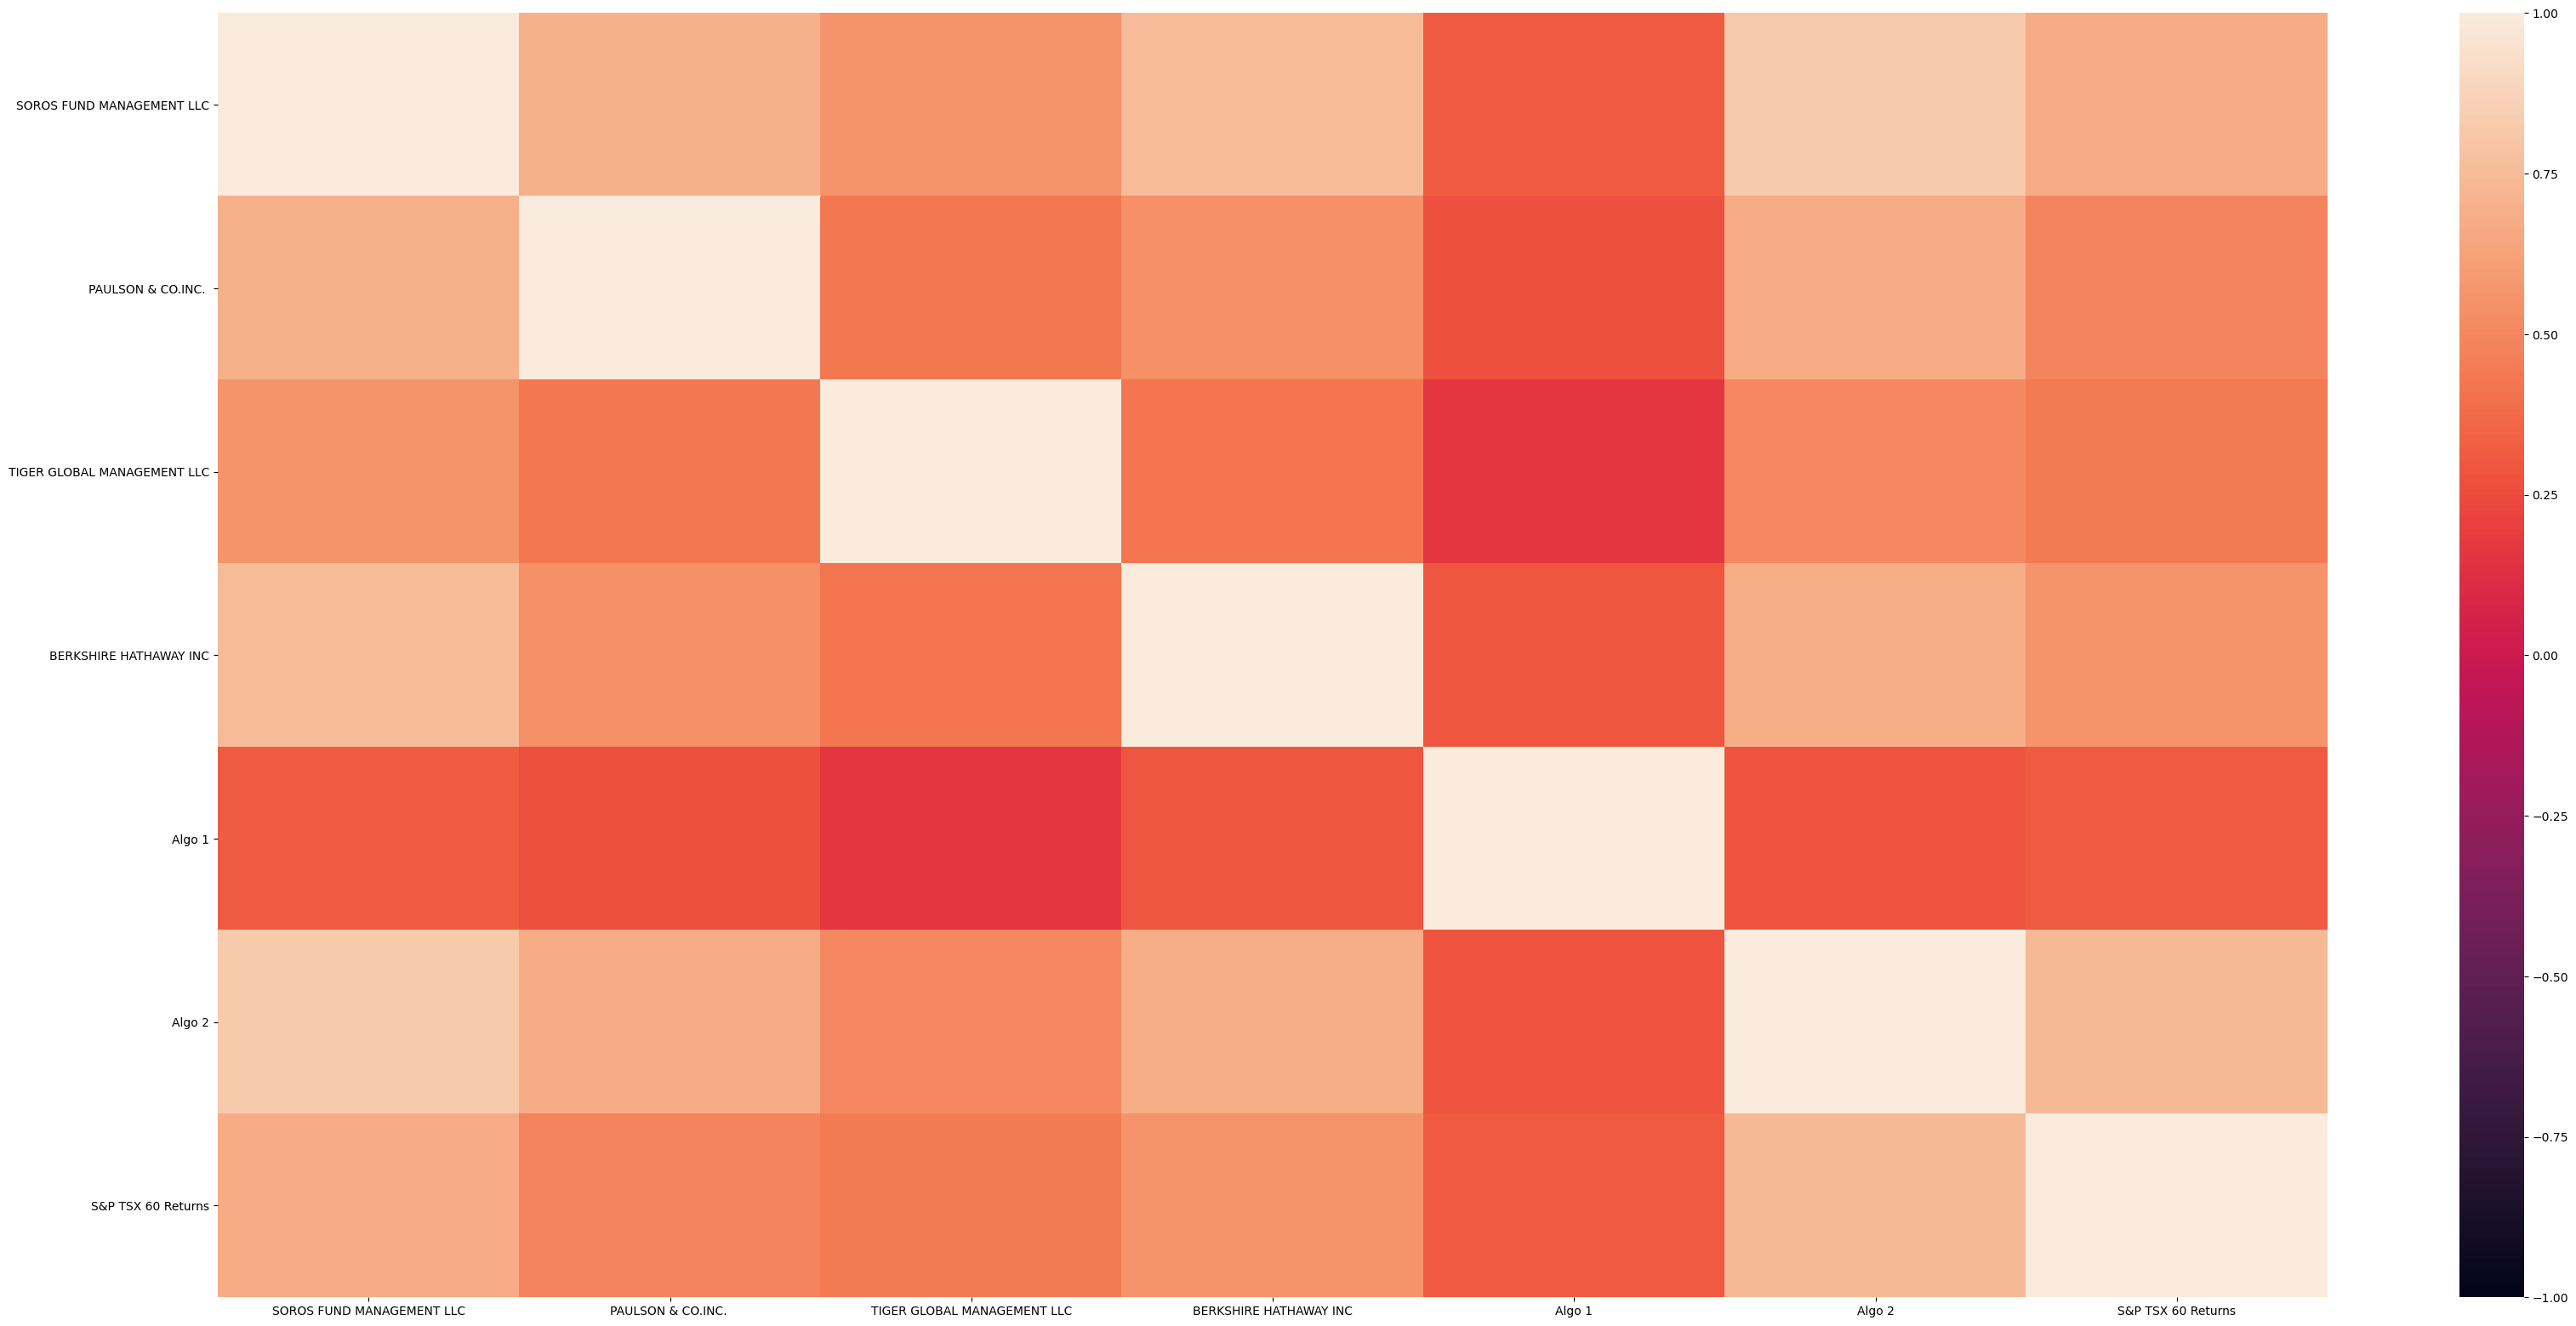

In [73]:
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of BRK Returns vs. S&P TSX 60'}, xlabel='Date'>

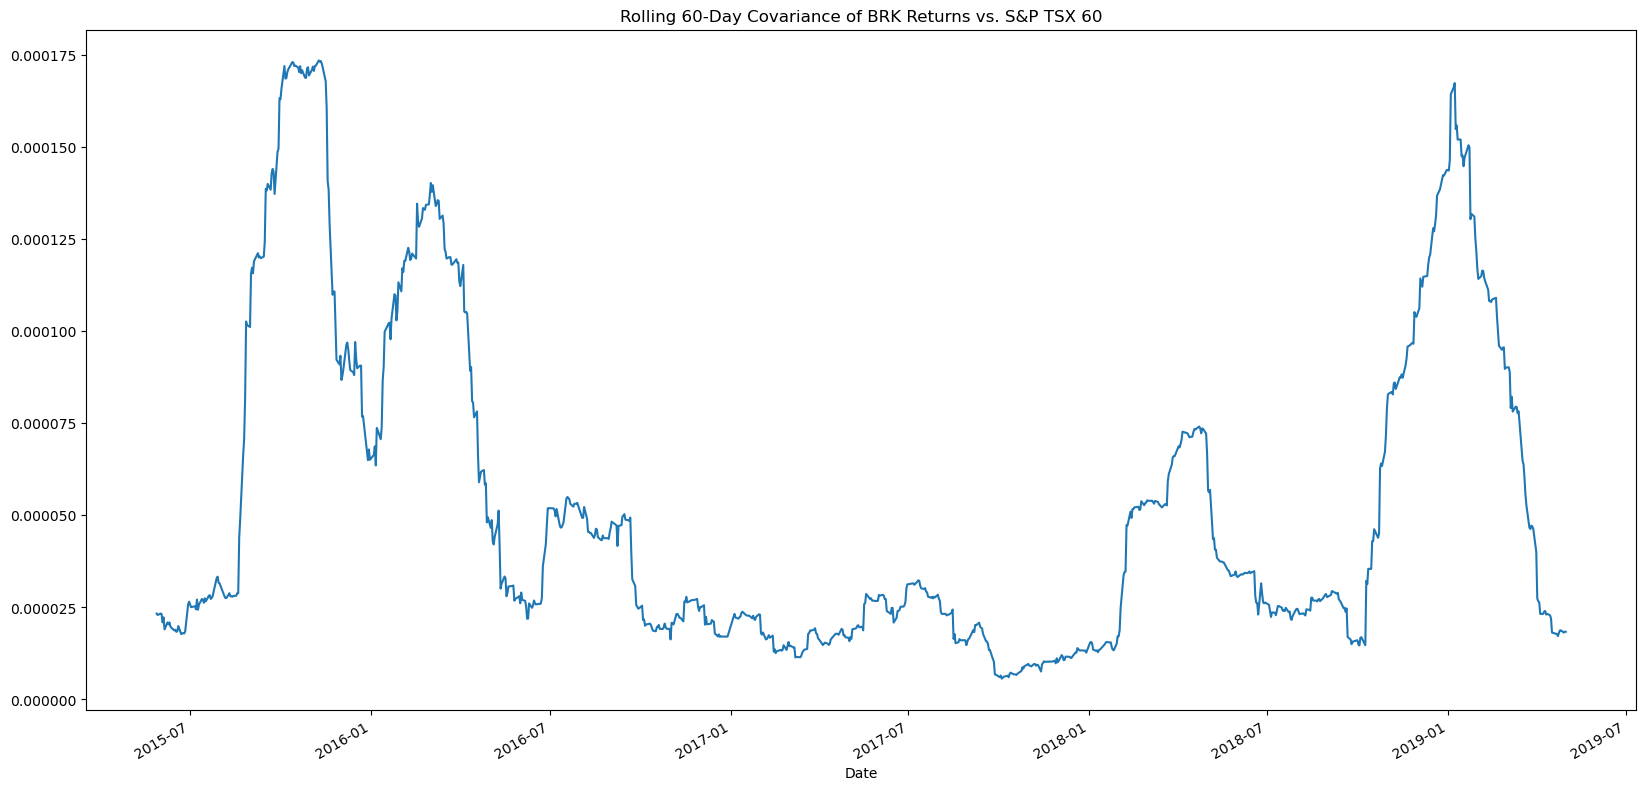

In [72]:
#Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

# 1. Calculate variance of all daily returns of BRK vs. S&P TSX 60
# 2. Calculate covariance of all daily returns of BRK vs. S&P TSX 60
# 3. Calculate beta of all daily returns of BRK
# 4. Calculate 30-day rolling covariance of AMZN vs. S&P 500 and plot the data
rolling_covariance = combined_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_returns_df['S&P TSX 60 Returns'])
rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of BRK Returns vs. S&P TSX 60')


In [78]:
# Rolling Statistics Challenge: Exponentially Weighted Average
combined_returns_ewm_df = pd.DataFrame({'BERKSHIRE HATHAWAY INC': [0, 2, 4, np.nan, 6]})
combined_returns_ewm_df


BERKSHIRE HATHAWAY INC
0                     0.0
1                     2.0
2                     4.0
3                     NaN
4                     6.0

In [80]:
combined_returns_ewm_df.ewm(com=0.5).mean()

BERKSHIRE HATHAWAY INC
0                0.000000
1                1.500000
2                3.230769
3                3.230769
4                5.617021

In [84]:
#times = ['2018-01-01','2018-01-22','2018-03-05','2018-03-26','2018-04-16','2018-05-07','2018-05-28','2018-06-18','2018-07-09','2018-07-30','2018-08-20','2018-09-10','2018-10-01','2018-10-22','2018-11-12','2018-12-03','2018-12-24']


times = ['2018-01-01','2018-01-22','2018-03-05','2018-03-26','2018-04-16']
combined_returns_ewm_df.ewm(halflife="21 days",times=pd.DatetimeIndex(times)).mean()

BERKSHIRE HATHAWAY INC
0                0.000000
1                1.333333
2                3.272727
3                3.272727
4                5.302326

In [88]:
#Sharpe Ratios
# Code Reference: https://towardsdatascience.com/calculating-sharpe-ratio-with-python-755dcb346805

# Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
# Assuming risk free rate = 0 
sharpe_ratios = (combined_returns_df.mean() / (combined_returns_df.std()) * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX 60 Returns             0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

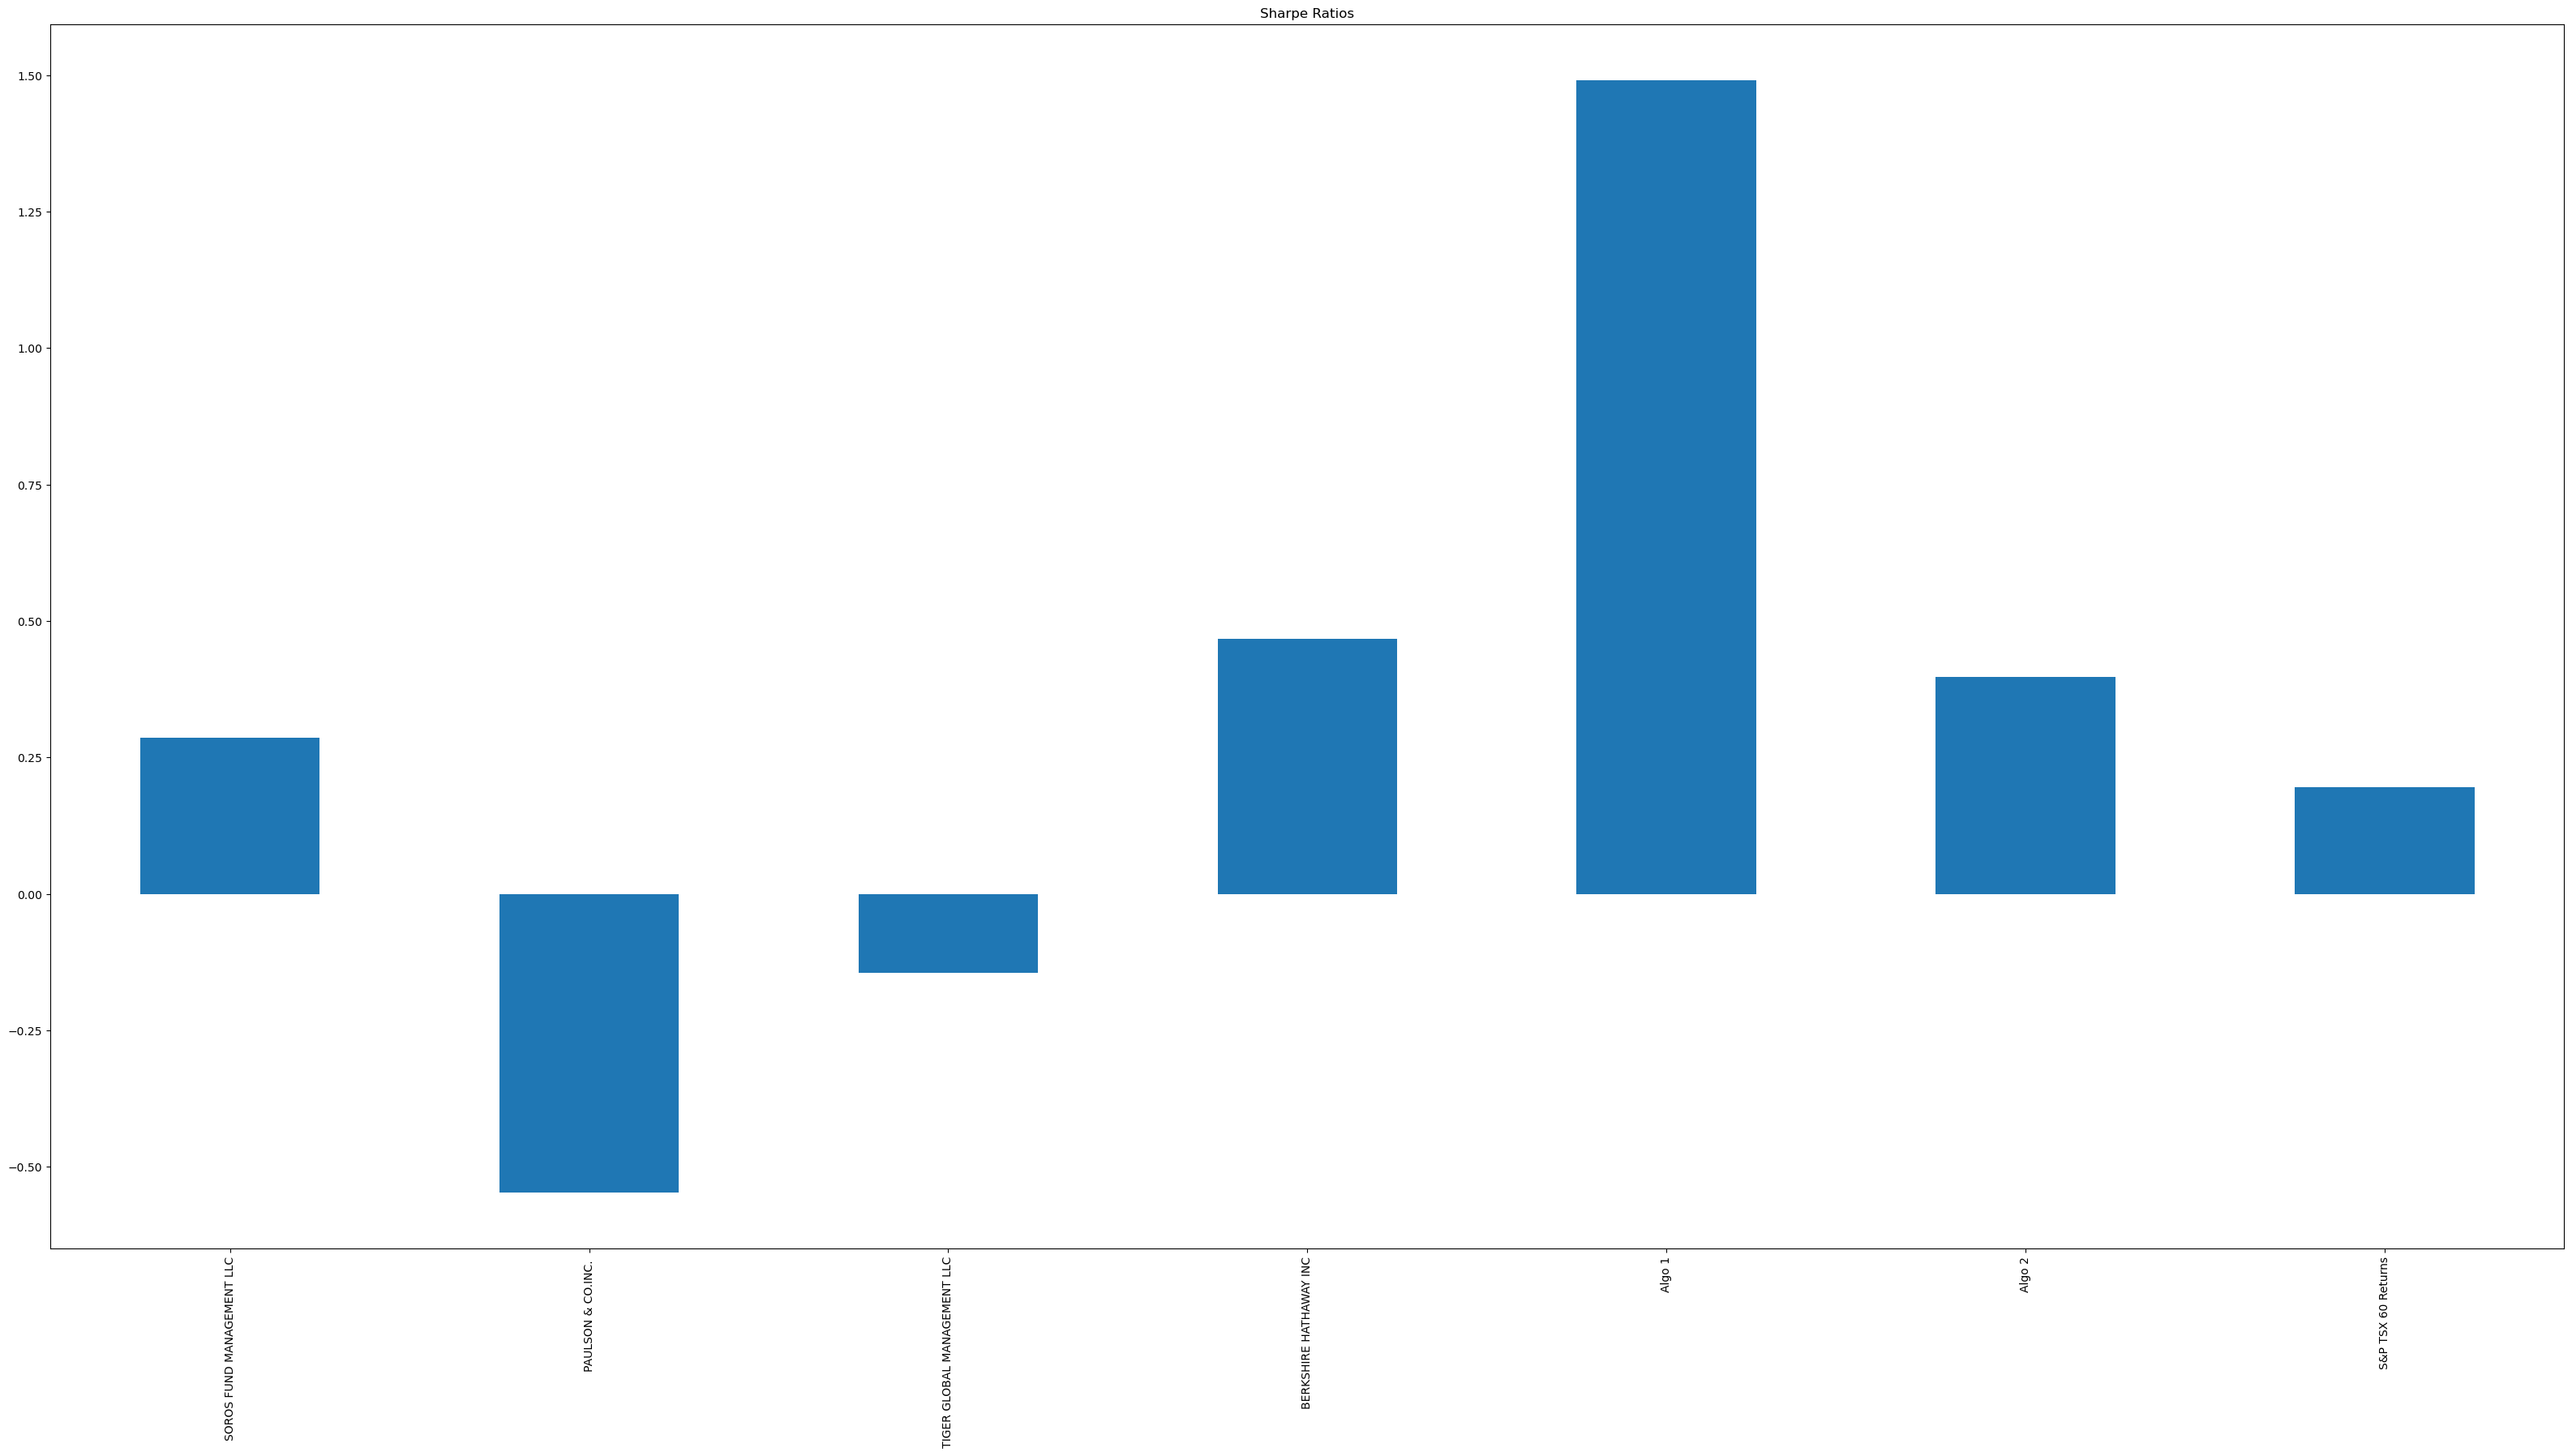

In [89]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [91]:
snp_sharpe_ratios_avg = sharpe_ratios.mean('S&P TSX 60 Returns')
snp_sharpe_ratios_avg

ValueError: No axis named S&P TSX 60 Returns for object type Series